# IMPORT

In [1]:
!pip install autocorrect
!pip install symspellpy jamo hangul_utils
!pip install transformers
!pip install preprocess
!pip install contractions
!pip install symspellpy
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=926bfb66bb61ae8b52a71184ffcd8e1cd40366b71a0d153d3fed1e21d5b8382e
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
Requested hangul_utils from https://files.pythonhosted.org/packages/b8/af/9e1beb71959c171d0dfbdd16e475a3ef45bc4bb4b5fd3d5816aad1c46c3c/hangul_utils-0.4.5-py3-none-any.whl has invalid metadata: Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    mecab-python (==0.996-ko-0.9.2)
                 ~~~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested hangul_utils from https://files.pythonhosted.org/packages/26/cf/3347a5fa6512dc05a6b840a77fb6067ff89a87587d141959b80c26518208/hangul_utils-0.4.4-py3-none-any.whl has invalid meta

In [2]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pickle import dump, load
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
import warnings
import matplotlib.dates as mdates

# Ignore warnings
warnings.filterwarnings("ignore")

# NLTK and other libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import requests
import contractions
import spacy
import tqdm

# Additional imports
import transformers
from transformers import BertTokenizer, BertModel, get_linear_schedule_with_warmup

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Set up matplotlib date formatter
import matplotlib.dates as mdates


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
!pip install --upgrade tensorflow


In [4]:
# Importing libraries
#import shap
import tensorflow as tf
import os
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
print(tf.__version__)



import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
import tensorflow as tf
from dateutil import parser

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
#import shap
from matplotlib import pyplot
import csv
from datetime import datetime
#import keras_tuner

sns.set_style("dark")
plt.style.use("dark_background")
plt.rcParams['figure.facecolor'] = '#151934'
plt.rcParams['axes.facecolor'] = '#151934'
plt.rcParams.update({'axes.facecolor': '#151934'})
sns.set_palette('pastel')
sns.set_context('talk')
import pandas as pd
# Parse dates and set date column to index

import datetime
from datetime import date, time

# Create a function to plot time series data
def plot_time_series(timesteps, values, format='-', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("DJIA Stock Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


import tensorflow as tf

def evaluate_preds(y_true, y_pred):
    # Ensure input tensors are of type float32
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Instantiate metrics
    mae_metric = tf.keras.metrics.MeanAbsoluteError()
    mse_metric = tf.keras.metrics.MeanSquaredError()
    mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()

    # Calculate metrics using update_state and result methods
    mae_metric.update_state(y_true, y_pred)
    mae = mae_metric.result().numpy()

    mse_metric.update_state(y_true, y_pred)
    mse = mse_metric.result().numpy()

    rmse = tf.sqrt(mse).numpy()

    mape_metric.update_state(y_true, y_pred)
    mape = mape_metric.result().numpy()

    mase = mean_absolute_scaled_error(y_true, y_pred).numpy()

    return {
        "mae": mae,
        "mse": mse,
        "rmse": rmse,
        "mape": mape,
        "mase": mase
    }

# Example use
# naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
# naive_results



2.17.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#from tensorflow.keras.layers.experimental import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import inflect
import random
from keras.layers import Input, Dense, Reshape
from keras.models import Model
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Flatten, Input, Concatenate
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential

# FILE PATH

In [6]:
def generate_random_values(start_time, end_time, num_points):
    time_series = np.random.uniform(start_time, end_time, num_points)
    return time_series

In [7]:
def generate_text_data(time_series):
    p = inflect.engine()
    text_data = []

    for i in range(0, len(time_series)):
        diff = time_series[i] - time_series[i-1]
        diff_text = p.number_to_words(abs(diff))  # Convert the difference to text

        if diff > 0:
            text = f"The value increases by {diff_text}"
            if random.random() > 0.5:
                text = f"Now it is larger by {diff_text}."
        elif diff < 0:
            text = f"The value decreases by {diff_text}"
            if random.random() > 0.5:
                text = f"Now it is smaller by {diff_text}."
        else:
            text = "The value remains unchanged"

        text_data.append(text)

    return text_data



In [8]:
def generate_text_embeddings(text_data):
    # Initialize the text vectorization layer
    text_vectorizer = preprocessing.TextVectorization(output_mode="int")

    # Adapt the text vectorization layer to the text data
    text_vectorizer.adapt(text_data)

    # Convert text data to text embeddings
    text_embeddings = text_vectorizer(text_data)

    return text_embeddings

In [9]:
# batch_size is set to 8, 16, 32.., which determines the number of samples processed in each training iteration.
batch_size = 512

# latent_dim is set to 100, representing the dimensionality of the latent space used in the model.
latent_dim = 100

# vocab_size is set to 27, indicating the size of the vocabulary for text embeddings.
vocab_size = 27

# embedding_dim is set to 27, representing the dimensionality of the text embeddings.
embedding_dim = 26


In [10]:
!pip install inflect



In [11]:
import inflect
import random

def generate_text_data(time_series):
    p = inflect.engine()
    text_data = []

    for i in range(len(time_series)):
        # Handle the first element separately
        if i == 0:
            text_data.append("This is the starting value.")
            continue

        # Calculate the difference from the previous value
        diff = time_series[i] - time_series[i-1]
        diff_text = p.number_to_words(abs(diff))  # Convert the difference to text

        # Generate text based on the difference
        if diff > 0:
            text_options = [
                f"The value increases by {diff_text}.",
                f"Now it is larger by {diff_text}."
            ]
        elif diff < 0:
            text_options = [
                f"The value decreases by {diff_text}.",
                f"Now it is smaller by {diff_text}."
            ]
        else:
            text_options = [
                "The value remains unchanged."
            ]

        # Randomly select from text options for variation
        text_data.append(random.choice(text_options))

    return text_data


In [12]:
from tensorflow.keras.layers import TextVectorization

def generate_text_embeddings(text_data):
    # Initialize the text vectorization layer
    text_vectorizer = TextVectorization(output_mode="int")

    # Adapt the text vectorization layer to the text data
    text_vectorizer.adapt(text_data)

    # Convert text data to text embeddings
    text_embeddings = text_vectorizer(text_data)

    return text_embeddings


In [13]:
start_time = 0
end_time = 1
num_points = 1000

time_series = generate_random_values(start_time, end_time, num_points)

text_data = generate_text_data(time_series)

text_embeddings = generate_text_embeddings(text_data)


# Create a DataFrame from the time series data
df = pd.DataFrame({'Time': np.linspace(start_time, end_time, num_points), 'Value': time_series, "Text": text_data})

print(df.head())

       Time     Value                                               Text
0  0.000000  0.413926                        This is the starting value.
1  0.001001  0.108536  The value decreases by zero point three zero f...
2  0.002002  0.431113  Now it is larger by zero point three two two f...
3  0.003003  0.334724  Now it is smaller by zero point zero nine six ...
4  0.004004  0.165551  The value decreases by zero point one six nine...


In [14]:
# Only want closing price for each day
prices = pd.DataFrame(df["Value"]).rename(columns={"Close": "Price"})
prices.head()

Value
0  0.413926
1  0.108536
2  0.431113
3  0.334724
4  0.165551

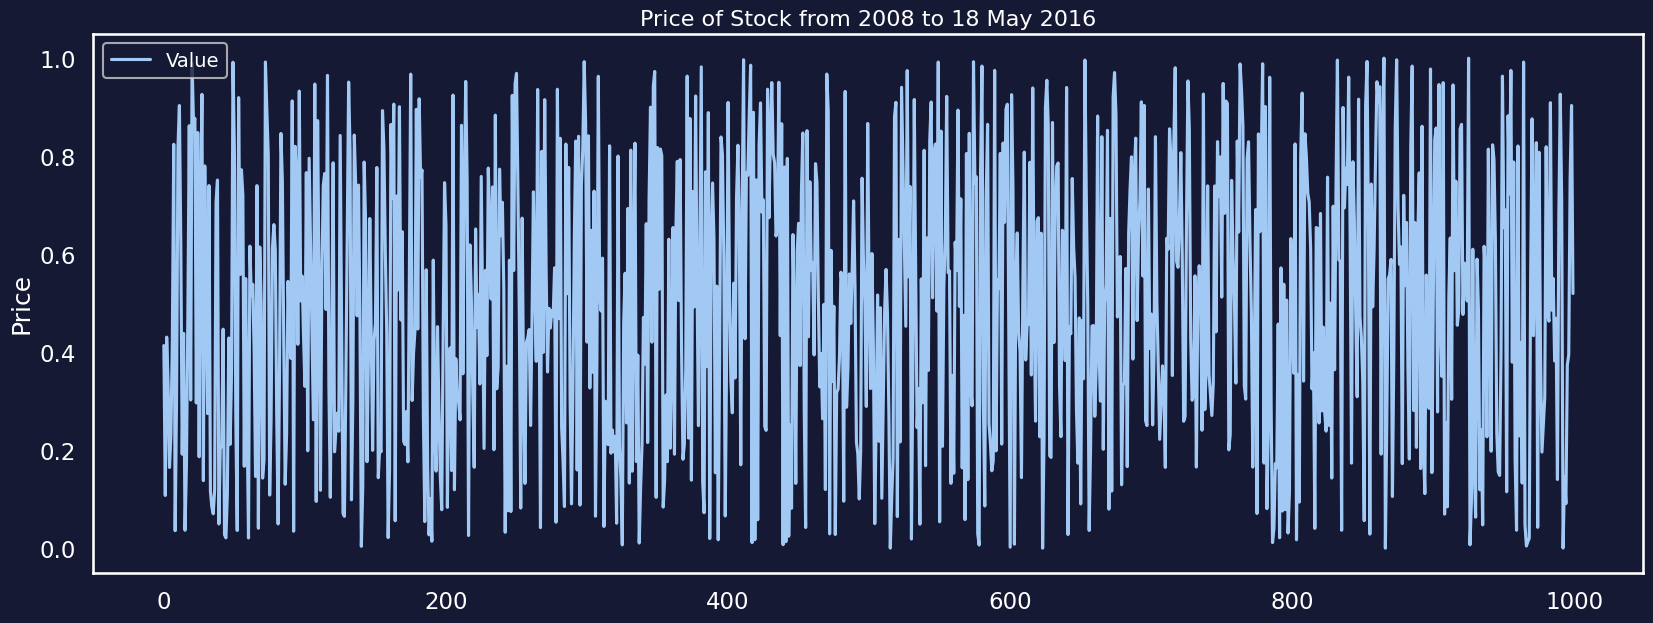

In [15]:
import matplotlib.pyplot as plt
prices.plot(figsize=(20, 7))
plt.ylabel("Price")
plt.title("Price of Stock from 2008 to 18 May 2016", fontsize=16)
plt.legend(fontsize=14);

In [16]:
#Drop NaN Values
df = df.dropna()

# Rename 'Value' column to 'Price'
df = df.rename(columns={"Value": "Close"})

# Display the updated DataFrame
df.head()

Time     Close                                               Text
0  0.000000  0.413926                        This is the starting value.
1  0.001001  0.108536  The value decreases by zero point three zero f...
2  0.002002  0.431113  Now it is larger by zero point three two two f...
3  0.003003  0.334724  Now it is smaller by zero point zero nine six ...
4  0.004004  0.165551  The value decreases by zero point one six nine...

In [17]:
# Remove the 'Time' and 'Text' columns
df = df.drop(columns=["Time", "Text"])

# Display the updated DataFrame
df.head()

Close
0  0.413926
1  0.108536
2  0.431113
3  0.334724
4  0.165551

In [18]:
df_1 = df
WINDOW_SIZE = 1
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = df_1.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Close+{i+1}"] = bitcoin_prices_windowed["Close"].shift(periods=i+1)
bitcoin_prices_windowed = bitcoin_prices_windowed.dropna()
#bitcoin_prices_windowed[f"c+{-1}"] = bitcoin_prices_windowed["c"].shift(periods=-1)

#Close

bitcoin_prices_windowed[f"Close	+{-1}"] = bitcoin_prices_windowed["Close"].shift(periods=-1)
bitcoin_prices_windowed.rename(columns={'Close\t+-1': 'Close Price'}, inplace=True)

#bitcoin_prices_windowed.rename(columns={'c+-1': 'Close'}, inplace=True)

In [19]:
bitcoin_prices_windowed.head(5)

Close   Close+1  Close Price
1  0.108536  0.413926     0.431113
2  0.431113  0.108536     0.334724
3  0.334724  0.431113     0.165551
4  0.165551  0.334724     0.232679
5  0.232679  0.165551     0.422692

In [20]:
bitcoin_prices_windowed.tail(5)

Close   Close+1  Close Price
995  0.374545  0.091821     0.394849
996  0.394849  0.374545     0.755733
997  0.755733  0.394849     0.903117
998  0.903117  0.755733     0.520080
999  0.520080  0.903117          NaN

In [21]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Close Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Close Price"].astype(np.float32)
X.head()


Close   Close+1
1  0.108536  0.413926
2  0.431113  0.108536
3  0.334724  0.431113
4  0.165551  0.334724
5  0.232679  0.165551

In [22]:
y.head(5)

1    0.431113
2    0.334724
3    0.165551
4    0.232679
5    0.422692
Name: Close Price, dtype: float32

In [23]:

split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)


(798, 798, 200, 200)

In [24]:
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = X_test.to_numpy()
y_test  = y_test.to_numpy()


In [25]:
bitcoin_prices_windowed

Close   Close+1  Close Price
1    0.108536  0.413926     0.431113
2    0.431113  0.108536     0.334724
3    0.334724  0.431113     0.165551
4    0.165551  0.334724     0.232679
5    0.232679  0.165551     0.422692
..        ...       ...          ...
995  0.374545  0.091821     0.394849
996  0.394849  0.374545     0.755733
997  0.755733  0.394849     0.903117
998  0.903117  0.755733     0.520080
999  0.520080  0.903117          NaN

[999 rows x 3 columns]

In [26]:
# Convert data to integers
X_all = bitcoin_prices_windowed.drop(["Close Price"], axis=1).dropna().to_numpy().astype(int)
y_all = bitcoin_prices_windowed.dropna()["Close Price"].to_numpy().astype(int)

# Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 16
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [27]:
X_all

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [28]:
last_window = X_all[-1:]
last_window.shape[1]

2

In [29]:
# How many timesteps to predict into the future?
INTO_FUTURE = 1 # since our Bitcoin data is daily, this is for 14 days

In [30]:
future_forecast = []
last_window = X_all[-1:]

In [31]:
last_window

array([[0, 0]])

# CNN

In [32]:
split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(798, 798, 200, 200)

In [33]:
# Check shapes
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')


x_train shape: (798, 2)
x_test shape: (200, 2)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], 1)))  # Adjust kernel_size
model.add(MaxPooling1D(pool_size=1))  # Adjust pool_size
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', padding='same'))  # Adjust kernel_size
model.add(MaxPooling1D(pool_size=1))  # Adjust pool_size
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Adjusted learning rate
learning_rate = 0.0001

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {test_mae}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0826 - mae: 0.2495
Test Mean Absolute Error: 0.2542354166507721


Test Mean Absolute Error: 0.2542


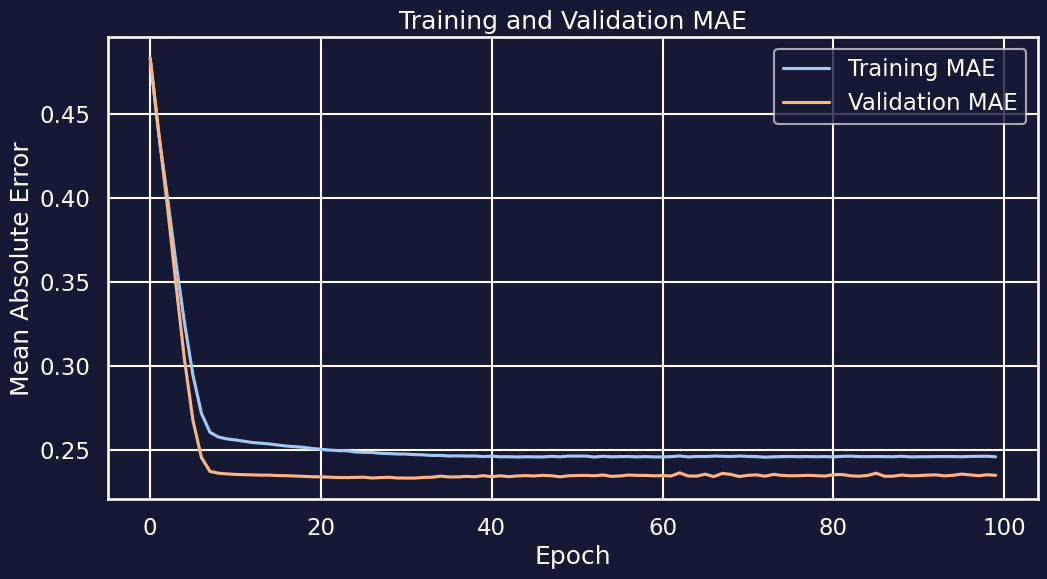

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


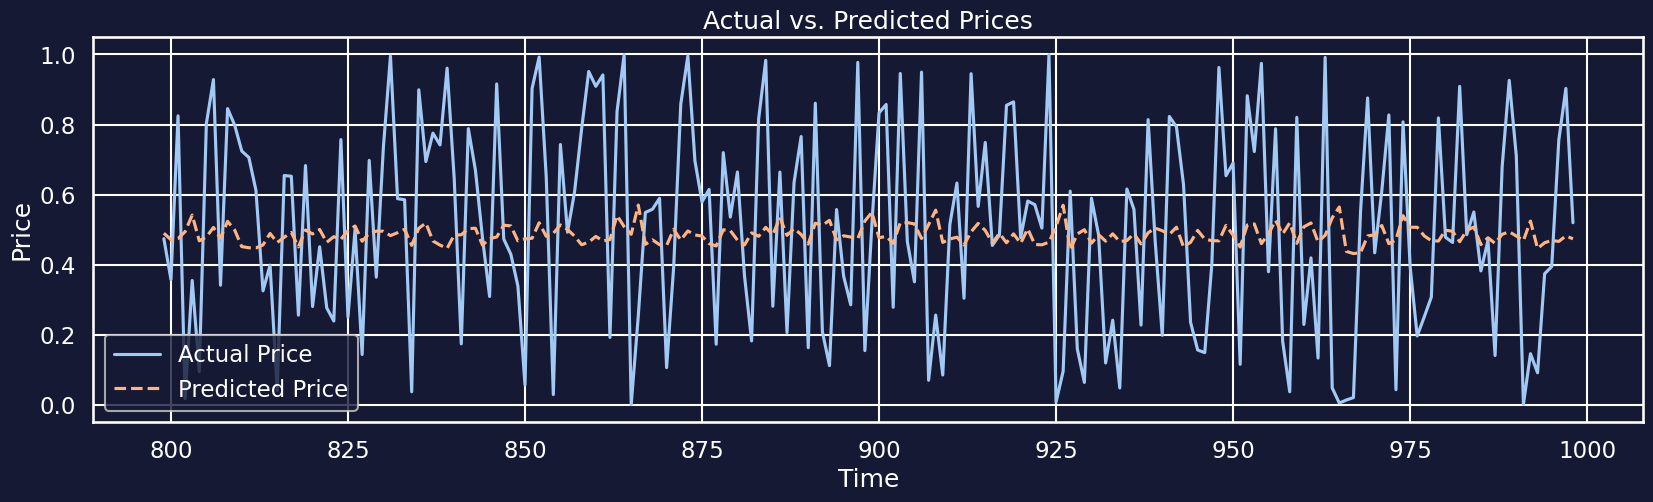

In [49]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Mean Absolute Error: {test_mae:.4f}')

# Plot training history (optional)
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions on the test set
predictions = model.predict(x_test)

# Ensure predictions and true values are 1-dimensional arrays
predictions = predictions.flatten()
y_test_aligned_flat = y_test[:len(predictions)].flatten()

# Define a function to plot time series
def plot_time_series(time, values, format="-", label=None):
    plt.plot(time, values, format, label=label)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Actual vs. Predicted Prices')
    if label:
        plt.legend()

split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)
# Plot future price predictions
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test_aligned_flat, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions, format="--", label="Predicted Price")
plt.grid(True)
plt.show()


CNN Model Results: {'mae': 0.25423542, 'mse': 0.08697601, 'rmse': 0.29491693, 'mape': 619.15186, 'mase': 0.76414144}
Model Results DataFrame:
                  mae        mape      mase       mse      rmse
CNN_results  0.254235  619.151855  0.764141  0.086976  0.294917


<Figure size 500x500 with 0 Axes>

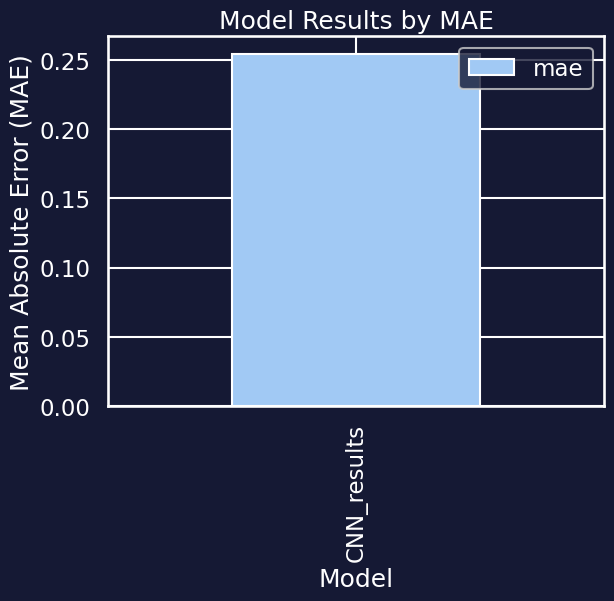

In [50]:
CNN_model_results = evaluate_preds(y_true=y_test_aligned_flat, y_pred=predictions)
print("CNN Model Results:", CNN_model_results)

# Compare different model results (e.g., w = window size, h = horizon)
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results
}).T

print("Model Results DataFrame:")
print(model_results)

# Sort model results by MAE and plot them
plt.figure(figsize=(5, 5))
model_results[["mae"]].sort_values(by="mae").plot(kind="bar")
plt.title("Model Results by MAE")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(True)
plt.show()

# Clean Text data

In [87]:
# Create a DataFrame from the time series data
df = pd.DataFrame({'Time': np.linspace(start_time, end_time, num_points), 'Value': time_series, "Text": text_data})

# Remove the 'Time' and 'Text' columns
df = df.drop(columns=["Time"])

df

Value                                               Text
0    0.413926                        This is the starting value.
1    0.108536  The value decreases by zero point three zero f...
2    0.431113  Now it is larger by zero point three two two f...
3    0.334724  Now it is smaller by zero point zero nine six ...
4    0.165551  The value decreases by zero point one six nine...
..        ...                                                ...
995  0.374545  Now it is larger by zero point two eight two s...
996  0.394849  The value increases by zero point zero two zer...
997  0.755733  Now it is larger by zero point three six zero ...
998  0.903117  Now it is larger by zero point one four seven ...
999  0.520080  Now it is smaller by zero point three eight th...

[1000 rows x 2 columns]

In [88]:
sent_df = df.copy()

data1_new = sent_df


In [89]:
data1_new.head(2)

Value                                               Text
0  0.413926                        This is the starting value.
1  0.108536  The value decreases by zero point three zero f...

In [90]:
final_df = data1_new

In [91]:
data =final_df

In [92]:
data['MA7'] = data.iloc[:,0].rolling(window=7).mean() #Close column
data['MA20'] = data.iloc[:,0].rolling(window=20).mean() #Close Column
#data['MACD'] = data.iloc[:,0].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()
    #This is the difference of Closing price and Opening Price

    # Create Bollinger Bands
data['20SD'] = data.iloc[:, 0].rolling(20).std()
data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    # Create Exponential moving average
data['EMA'] = data.iloc[:,0].ewm(com=0.5).mean()

In [93]:
data

Value                                               Text       MA7  \
0    0.413926                        This is the starting value.       NaN   
1    0.108536  The value decreases by zero point three zero f...       NaN   
2    0.431113  Now it is larger by zero point three two two f...       NaN   
3    0.334724  Now it is smaller by zero point zero nine six ...       NaN   
4    0.165551  The value decreases by zero point one six nine...       NaN   
..        ...                                                ...       ...   
995  0.374545  Now it is larger by zero point two eight two s...  0.418635   
996  0.394849  The value increases by zero point zero two zer...  0.377932   
997  0.755733  Now it is larger by zero point three six zero ...  0.353580   
998  0.903117  Now it is larger by zero point one four seven ...  0.381100   
999  0.520080  Now it is smaller by zero point three eight th...  0.455209   

         MA20      20SD  upper_band  lower_band       EMA  
0         NaN       NaN         NaN         NaN  0.413926  
1         NaN       NaN         NaN         NaN  0.184883  
2         NaN       NaN         NaN         NaN  0.355350  
3         NaN       NaN         NaN         NaN  0.341427  
4         NaN       NaN         NaN         NaN  0.223692  
..        ...       ...         ...         ...       ...  
995  0.439153  0.267398    0.973949   -0.095642  0.290096  
996  0.439079  0.267411    0.973900   -0.095743  0.359931  
997  0.467019  0.269959    1.006937   -0.072898  0.623799  
998  0.499598  0.281650    1.062897   -0.063701  0.810011  
999  0.510203  0.278024    1.066252   -0.045846  0.616724  

[1000 rows x 8 columns]

In [94]:
data = data.dropna()

In [95]:
data1_new = data

In [96]:
final_spell = data1_new[["Text"]]

In [97]:
final_df = data1_new[['Value']]

In [98]:
final_df

Value
19   0.303061
20   0.988992
21   0.868270
22   0.876904
23   0.297055
..        ...
995  0.374545
996  0.394849
997  0.755733
998  0.903117
999  0.520080

[981 rows x 1 columns]

In [99]:
final = final_df

In [100]:
final.head(5)

Value
19  0.303061
20  0.988992
21  0.868270
22  0.876904
23  0.297055

In [101]:
final = final.dropna()

In [102]:
training_news = final_spell

In [103]:
training_news

Text
19   Now it is smaller by zero point five five eigh...
20   Now it is larger by zero point six eight five ...
21   Now it is smaller by zero point one two zero s...
22   The value increases by zero point zero zero ei...
23   Now it is smaller by zero point five seven nin...
..                                                 ...
995  Now it is larger by zero point two eight two s...
996  The value increases by zero point zero two zer...
997  Now it is larger by zero point three six zero ...
998  Now it is larger by zero point one four seven ...
999  Now it is smaller by zero point three eight th...

[981 rows x 1 columns]

In [104]:
split_size = int(len(final_spell) * 0.8)
split_size


784

In [105]:
train_news = training_news[:split_size]


In [106]:
len(train_news)


784

In [107]:
len(training_news)

981

In [108]:
len(final_spell)

981

In [109]:
split_size = int(len(final_spell) * 0.8)
split_size

784

In [110]:
train_news = training_news[:800]
train_news.head(5)

Text
19  Now it is smaller by zero point five five eigh...
20  Now it is larger by zero point six eight five ...
21  Now it is smaller by zero point one two zero s...
22  The value increases by zero point zero zero ei...
23  Now it is smaller by zero point five seven nin...

In [111]:
len(train_news)

800

In [112]:
test_news = training_news[split_size:]
test_news.head(5)

Text
803  Now it is smaller by zero point eight zero six...
804  The value increases by zero point three three ...
805  The value decreases by zero point two six zero...
806  The value increases by zero point seven zero s...
807  Now it is larger by zero point one two five ni...

In [113]:
test_news.tail(5)

Text
995  Now it is larger by zero point two eight two s...
996  The value increases by zero point zero two zer...
997  Now it is larger by zero point three six zero ...
998  Now it is larger by zero point one four seven ...
999  Now it is smaller by zero point three eight th...

In [114]:
data

Value                                               Text       MA7  \
19   0.303061  Now it is smaller by zero point five five eigh...  0.354027   
20   0.988992  Now it is larger by zero point six eight five ...  0.467803   
21   0.868270  Now it is smaller by zero point one two zero s...  0.529163   
22   0.876904  The value increases by zero point zero zero ei...  0.649057   
23   0.297055  Now it is smaller by zero point five seven nin...  0.667242   
..        ...                                                ...       ...   
995  0.374545  Now it is larger by zero point two eight two s...  0.418635   
996  0.394849  The value increases by zero point zero two zer...  0.377932   
997  0.755733  Now it is larger by zero point three six zero ...  0.353580   
998  0.903117  Now it is larger by zero point one four seven ...  0.381100   
999  0.520080  Now it is smaller by zero point three eight th...  0.455209   

         MA20      20SD  upper_band  lower_band       EMA  
19   0.404906  0.274218    0.953342   -0.143529  0.434916  
20   0.433660  0.303770    1.041201   -0.173881  0.804300  
21   0.471646  0.308440    1.088527   -0.145234  0.846946  
22   0.493936  0.321201    1.136337   -0.148466  0.866918  
23   0.492053  0.322292    1.136637   -0.152532  0.487009  
..        ...       ...         ...         ...       ...  
995  0.439153  0.267398    0.973949   -0.095642  0.290096  
996  0.439079  0.267411    0.973900   -0.095743  0.359931  
997  0.467019  0.269959    1.006937   -0.072898  0.623799  
998  0.499598  0.281650    1.062897   -0.063701  0.810011  
999  0.510203  0.278024    1.066252   -0.045846  0.616724  

[981 rows x 8 columns]

In [115]:
X = data.drop(columns=['Value', 'Text'])
X

MA7      MA20      20SD  upper_band  lower_band       EMA
19   0.354027  0.404906  0.274218    0.953342   -0.143529  0.434916
20   0.467803  0.433660  0.303770    1.041201   -0.173881  0.804300
21   0.529163  0.471646  0.308440    1.088527   -0.145234  0.846946
22   0.649057  0.493936  0.321201    1.136337   -0.148466  0.866918
23   0.667242  0.492053  0.322292    1.136637   -0.152532  0.487009
..        ...       ...       ...         ...         ...       ...
995  0.418635  0.439153  0.267398    0.973949   -0.095642  0.290096
996  0.377932  0.439079  0.267411    0.973900   -0.095743  0.359931
997  0.353580  0.467019  0.269959    1.006937   -0.072898  0.623799
998  0.381100  0.499598  0.281650    1.062897   -0.063701  0.810011
999  0.455209  0.510203  0.278024    1.066252   -0.045846  0.616724

[981 rows x 6 columns]

In [116]:
split_size = int(len(X) * 0.8)
train_news = training_news[:split_size]
train_news.head(5)

Text
19  Now it is smaller by zero point five five eigh...
20  Now it is larger by zero point six eight five ...
21  Now it is smaller by zero point one two zero s...
22  The value increases by zero point zero zero ei...
23  Now it is smaller by zero point five seven nin...

In [117]:
test_news = training_news[split_size:]
test_news.head(5)

Text
803  Now it is smaller by zero point eight zero six...
804  The value increases by zero point three three ...
805  The value decreases by zero point two six zero...
806  The value increases by zero point seven zero s...
807  Now it is larger by zero point one two five ni...

In [118]:
X

MA7      MA20      20SD  upper_band  lower_band       EMA
19   0.354027  0.404906  0.274218    0.953342   -0.143529  0.434916
20   0.467803  0.433660  0.303770    1.041201   -0.173881  0.804300
21   0.529163  0.471646  0.308440    1.088527   -0.145234  0.846946
22   0.649057  0.493936  0.321201    1.136337   -0.148466  0.866918
23   0.667242  0.492053  0.322292    1.136637   -0.152532  0.487009
..        ...       ...       ...         ...         ...       ...
995  0.418635  0.439153  0.267398    0.973949   -0.095642  0.290096
996  0.377932  0.439079  0.267411    0.973900   -0.095743  0.359931
997  0.353580  0.467019  0.269959    1.006937   -0.072898  0.623799
998  0.381100  0.499598  0.281650    1.062897   -0.063701  0.810011
999  0.455209  0.510203  0.278024    1.066252   -0.045846  0.616724

[981 rows x 6 columns]

In [119]:
y = data[['Value']]
y

Value
19   0.303061
20   0.988992
21   0.868270
22   0.876904
23   0.297055
..        ...
995  0.374545
996  0.394849
997  0.755733
998  0.903117
999  0.520080

[981 rows x 1 columns]

In [120]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(784, 784, 197, 197)

In [121]:
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = X_test.to_numpy()
y_test  = y_test.to_numpy()

# GPT

In [122]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [123]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Concatenate
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import GPT2Tokenizer, TFGPT2Model

# Instantiate the GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2Model.from_pretrained("gpt2")




tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [124]:
corpus = train_news["Text"]

In [125]:
corpus_test = test_news["Text"]

In [126]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_train = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_train[0])

Padded Sequence: [3844  340  318 4833  416 6632  966 1936 1936 3624 3624  734 6632 1936
  530 1936 3598 6632 6632 1936 1936 2237 5193   13    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [127]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_test = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_test[0])

Padded Sequence: [3844  340  318 4833  416 6632  966 3624 6632 2237 2237 1936 3624 3598
 3624 1936 6632 1115 6632 1115 6632  530 1115   13    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [128]:
import numpy as np

# Assuming you have numerical features (X_train, X_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Merge numerical features and encoded text sequences for training set
x_train_combined = np.concatenate([x_train, padded_corpus_train], axis=1)

# Merge numerical features and encoded text sequences for testing set
#x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
#print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_train_combined: (784, 56)


In [129]:
x_test

array([[ 0.35074605,  0.31802142,  0.28951355,  0.89704853, -0.26100568,
         0.23940358],
       [ 0.39692669,  0.28775146,  0.24736066,  0.78247277, -0.20696986,
         0.3166759 ],
       [ 0.3939507 ,  0.27761457,  0.25105619,  0.77972696, -0.22449782,
         0.16889498],
       ...,
       [ 0.35358002,  0.46701937,  0.26995862,  1.0069366 , -0.07289787,
         0.62379928],
       [ 0.38110016,  0.49959769,  0.28164959,  1.06289686, -0.06370149,
         0.81001132],
       [ 0.45520942,  0.51020309,  0.27802432,  1.06625174, -0.04584556,
         0.61672389]])

In [130]:
x_train_combined

array([[0.35402747, 0.40490642, 0.27421788, ..., 0.        , 0.        ,
        0.        ],
       [0.46780317, 0.43365972, 0.30377045, ..., 0.        , 0.        ,
        0.        ],
       [0.52916312, 0.47164641, 0.30844038, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33990297, 0.3192871 , 0.29426863, ..., 0.        , 0.        ,
        0.        ],
       [0.31403186, 0.29213408, 0.26094497, ..., 0.        , 0.        ,
        0.        ],
       [0.42050513, 0.32929529, 0.28150377, ..., 0.        , 0.        ,
        0.        ]])

In [131]:
# Check the number of samples in each dataset
print("Number of samples in x_test:", x_test.shape[0])
print("Number of samples in padded_corpus_test:", padded_corpus_test.shape[0])

Number of samples in x_test: 197
Number of samples in padded_corpus_test: 197


In [132]:
min_samples = min(x_test.shape[0], padded_corpus_test.shape[0])

In [133]:
# Trim or pad the datasets
x_test = x_test[:min_samples]
padded_corpus_test = padded_corpus_test[:min_samples]

In [134]:
# Now, attempt the concatenation again
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

In [135]:
# Check the shape after concatenation
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_test_combined: (197, 56)


In [136]:
import numpy as np

# Assuming you have numerical features (X_train, X_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Merge numerical features and encoded text sequences for training set
x_train_combined = np.concatenate([x_train, padded_corpus_train], axis=1)

# Merge numerical features and encoded text sequences for testing set
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_train_combined: (784, 56)
Shape of x_test_combined: (197, 56)


In [137]:
combined_input_dim = 57



# keras with No text embedding

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0077 - mae: 0.0697
Test Mean Absolute Error: 0.0719166249036789


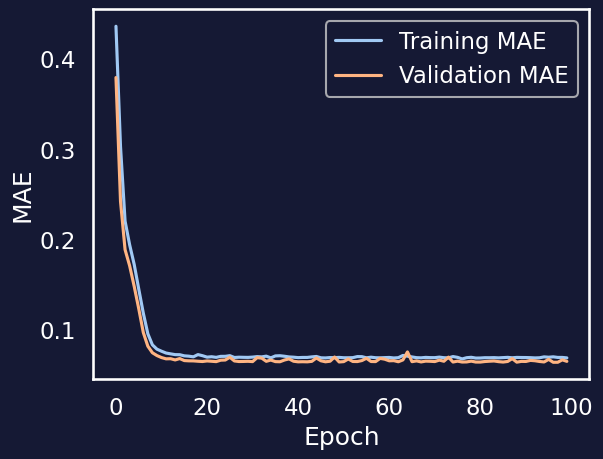

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - mae: 0.0697 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - mae: 0.0697 
Test Mean Absolute Error: 0.0719166249036789


{'mae': 0.071916625,
 'mse': 0.008180478,
 'rmse': 0.09044599,
 'mape': 157.1965,
 'mase': 0.21746376}

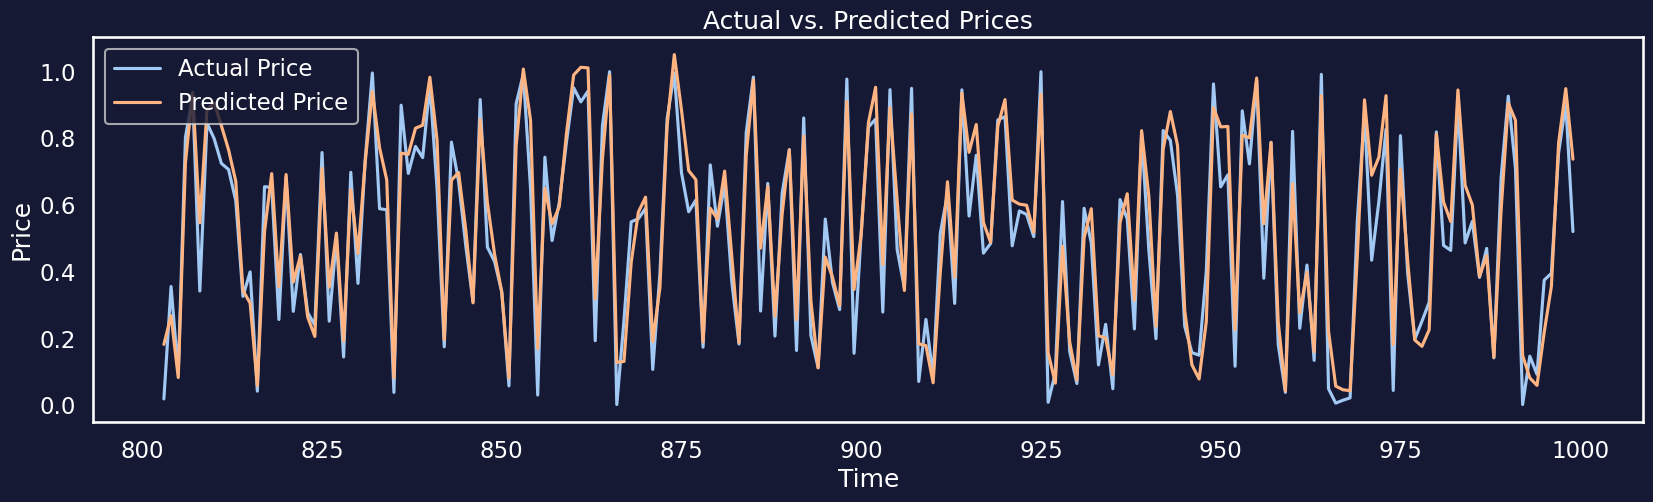

In [138]:
# prompt: build sequential model for no text embedding

# Define the model
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use linear activation for regression

# Adjusted learning rate
learning_rate = 0.0001

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(x_test).flatten()

model.evaluate(x_test,y_test)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions, format="-", label="Predicted Price")
plt.grid(False)

# Flatten y_test
y_test_flat = y_test.to_numpy().flatten()

# Evaluate the model's predictions
model_results = evaluate_preds(y_true=y_test_flat, y_pred=predictions)
model_results


{'mae': 0.071916625, 'mse': 0.008180478, 'rmse': 0.09044599, 'mape': 157.19652, 'mase': 1.0155494}


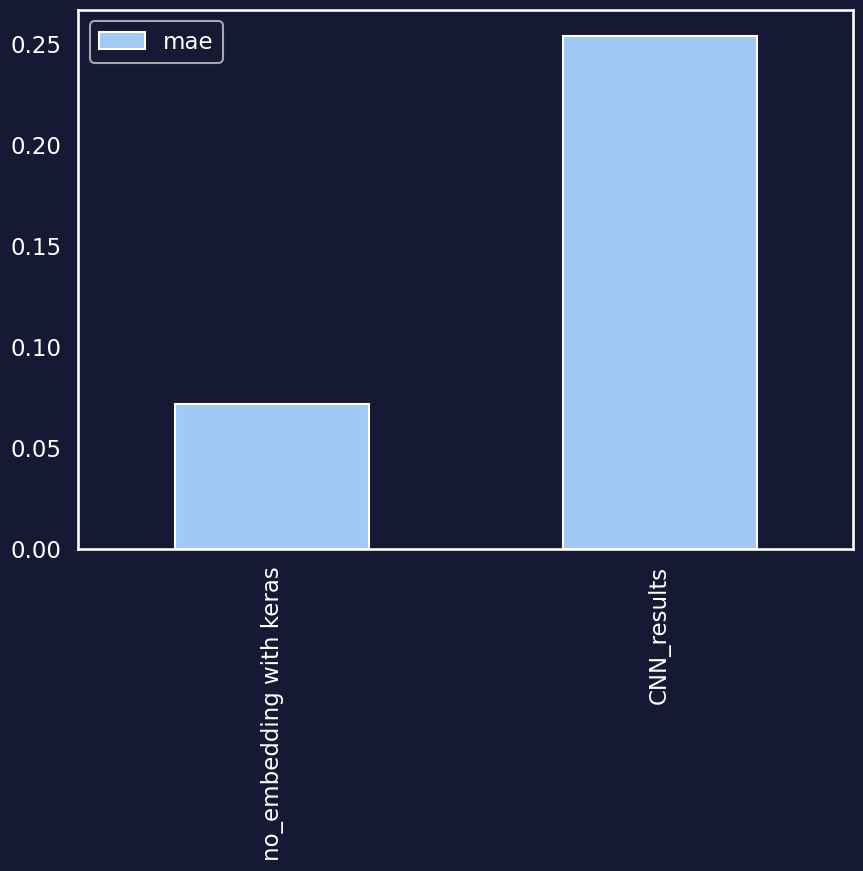

In [139]:
# Assuming evaluate_preds is a predefined function to evaluate predictions
model_results_no_embedding = evaluate_preds(y_true=y_test, y_pred=predictions)
print(model_results_no_embedding)

# Compare different model results (assuming naive_results, Keras_Sequential_Model_results, and CNN_model_results are predefined)
model_results = pd.DataFrame({"CNN_results": CNN_model_results,
                              "no_embedding with keras": model_results_no_embedding}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# GPT2 with No text embedding

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 376ms/step - loss: 0.2606 - mae: 0.4271 - val_loss: 0.1639 - val_mae: 0.3338
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1261 - mae: 0.2877 - val_loss: 0.0915 - val_mae: 0.2463
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0803 - mae: 0.2357 - val_loss: 0.0578 - val_mae: 0.2023
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 745ms/step


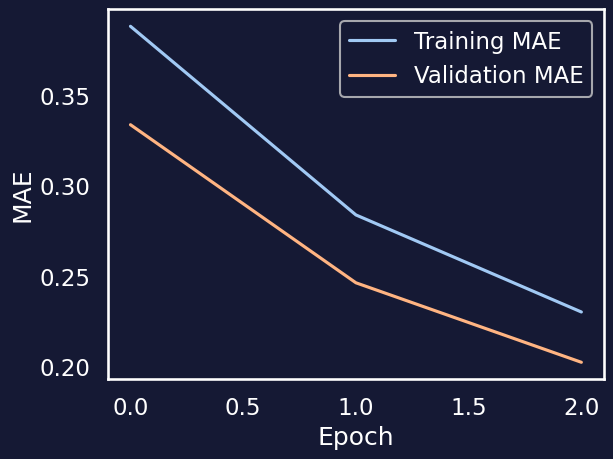

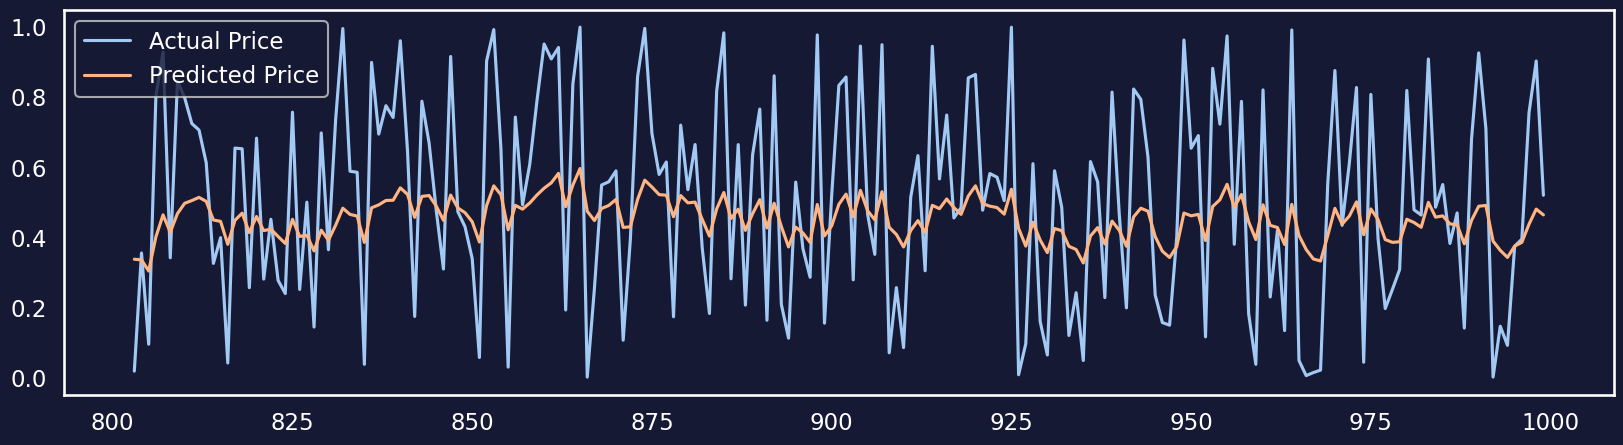

In [140]:
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

# Load GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
gpt2_model = TFGPT2Model.from_pretrained(model_name)

# Tokenize and pad the text data (for both training and testing)
max_length = 50  # Max sequence length for GPT-2

# Assuming corpus and corpus_test are lists of text data
encoded_corpus_train = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
encoded_corpus_test = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

padded_corpus_train = pad_sequences(encoded_corpus_train, maxlen=max_length, padding='post', truncating='post')
padded_corpus_test = pad_sequences(encoded_corpus_test, maxlen=max_length, padding='post', truncating='post')

# Create attention masks for the text data
attention_masks_train = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_train])
attention_masks_test = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_test])

# Define input shapes for numerical and text data
numerical_input_shape = X_train.shape[1]  # Based on the numerical input dimensions
text_input_shape = max_length

# Numerical input layer
numerical_input = Input(shape=(numerical_input_shape,), name="numerical_input")

# Text input layers
text_input_ids = Input(shape=(text_input_shape,), dtype=tf.int32, name="text_input_ids")
text_attention_masks = Input(shape=(text_input_shape,), dtype=tf.float32, name="text_attention_masks")

# Lambda function to use GPT-2 model
def get_gpt2_embeddings(inputs):
    input_ids, attention_mask = inputs
    gpt2_outputs = gpt2_model(input_ids, attention_mask=attention_mask)
    gpt2_embeddings = gpt2_outputs.last_hidden_state[:, 0, :]  # Take the [CLS] token embedding
    return gpt2_embeddings

# Wrap the GPT-2 model in a Lambda layer
gpt2_embeddings_layer = Lambda(get_gpt2_embeddings)([text_input_ids, text_attention_masks])

# Define a function to zero out embeddings
def zero_out_embeddings(embedding_tensor):
    return tf.zeros_like(embedding_tensor)

# Zero out embeddings
gpt2_embeddings_layer = Lambda(zero_out_embeddings)(gpt2_embeddings_layer)

# Concatenate numerical and text embeddings
combined_input = Concatenate()([numerical_input, gpt2_embeddings_layer])

# Define dense layers for regression
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Build the combined model
combined_model = Model(inputs=[numerical_input, text_input_ids, text_attention_masks], outputs=output_layer)

# Compile the model
learning_rate = 0.0001
combined_model.compile(optimizer=Adam(learning_rate=learning_rate),
                       loss='mean_squared_error',
                       metrics=['mae'])

# Train the model
history = combined_model.fit([X_train, padded_corpus_train, attention_masks_train],
                             y_train,
                             epochs=3,
                             batch_size=32,
                             validation_split=0.2)

# Align the sizes of padded_corpus_test and attention_masks_test with X_test and y_test
# Align the sizes of padded_corpus_test and attention_masks_test with X_test
padded_corpus_test_aligned = padded_corpus_test[:len(X_test)]
attention_masks_test_aligned = attention_masks_test[:len(X_test)]

# Ensure all data has the same length
assert len(padded_corpus_test_aligned) == len(X_test) == len(attention_masks_test_aligned), "Input data sizes are misaligned."

# Make predictions on the aligned test set
predictions_gpt2 = combined_model.predict([X_test, padded_corpus_test_aligned, attention_masks_test_aligned])

# Now you can proceed with evaluating or using the predictions



# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Make predictions on the test set
#predictions_gpt2 = combined_model.predict([X_test, padded_corpus_test, attention_masks_test])

# Flatten y_test
y_test_flat = y_test

# Plot predictions against actual values
plt.figure(figsize=(20, 5))
plt.plot(y_test.index, y_test_flat, label="Actual Price", linestyle="-")
plt.plot(y_test.index, predictions_gpt2.flatten(), label="Predicted Price", linestyle="-")
plt.legend()
plt.grid(False)
plt.show()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 749ms/step - loss: 0.0636 - mae: 0.2159 - val_loss: 0.0551 - val_mae: 0.1981 - learning_rate: 1.0000e-05
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0569 - mae: 0.2006 - val_loss: 0.0529 - val_mae: 0.1945 - learning_rate: 1.0000e-05
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0587 - mae: 0.2088 - val_loss: 0.0510 - val_mae: 0.1912 - learning_rate: 1.0000e-05
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0538 - mae: 0.1983 - val_loss: 0.0494 - val_mae: 0.1883 - learning_rate: 1.0000e-05
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0551 - mae: 0.2022 - val_loss: 0.0482 - val_mae: 0.1861 - learning_rate: 1.0000e-05
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0529 - mae: 0.1974 - val_loss: 0.0470 - val_mae: 0.1839 - learning_rate: 1.0000e-05
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0511 - mae: 0.1927 - val_loss: 0.0458 - val_mae: 0.1818 - learning_rat

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 557ms/step


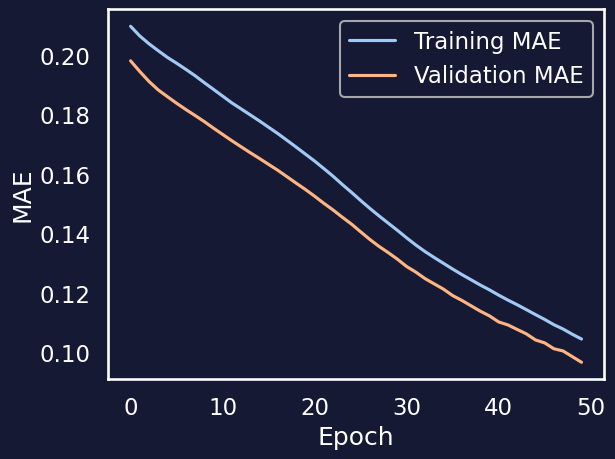

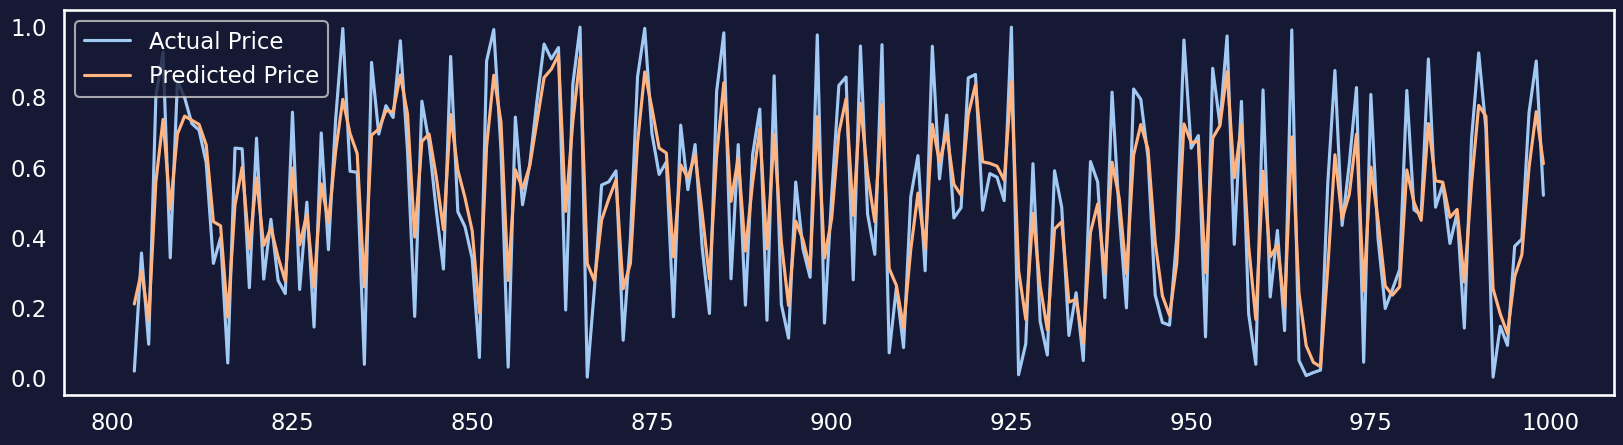

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 0.0163 - mae: 0.1066
Test Mean Absolute Error: 0.10696478933095932


In [141]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Adjust learning rate and add decay schedule for fine-tuning
learning_rate = 0.00001  # Lower learning rate for fine-tuning

# Rebuild the combined model with GPT-2 embeddings and numerical features
combined_model.compile(optimizer=Adam(learning_rate=learning_rate),
                       loss='mean_squared_error',
                       metrics=['mae'])

# Add callbacks for early stopping, model checkpoint, and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Fine-tune the model with more epochs and callbacks
history = combined_model.fit([X_train, padded_corpus_train, attention_masks_train],
                             y_train,
                             epochs=50,  # Increase the number of epochs
                             batch_size=32,  # Adjust batch size based on available memory
                             validation_split=0.2,
                             callbacks=[early_stopping, reduce_lr])

# Align the sizes of padded_corpus_test and attention_masks_test with X_test and y_test
padded_corpus_test_aligned = padded_corpus_test[:len(X_test)]
attention_masks_test_aligned = attention_masks_test[:len(X_test)]

# Make predictions on the aligned test set
predictions_gpt2 = combined_model.predict([X_test, padded_corpus_test_aligned, attention_masks_test_aligned])

# Plot training history to visualize improvement
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Flatten y_test for plotting
y_test_flat = y_test

# Plot predictions vs actual values
plt.figure(figsize=(20, 5))
plt.plot(y_test.index, y_test_flat, label="Actual Price", linestyle="-")
plt.plot(y_test.index, predictions_gpt2.flatten(), label="Predicted Price", linestyle="-")
plt.legend()
plt.grid(False)
plt.show()

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([X_test, padded_corpus_test_aligned, attention_masks_test_aligned], y_test)
print(f'Test Mean Absolute Error: {test_mae}')


Results with GPT-2 no embeddings: {'mae': 0.10696479, 'mse': 0.016669761, 'rmse': 0.12911142, 'mape': 317.06326, 'mase': 0.8953451}
                         mae       mse      rmse        mape      mase
CNN_results         0.254235  0.086976  0.294917  619.151855  0.764141
Keras_no_embedding  0.071917  0.008180  0.090446  157.196518  1.015549
GPT_no_embedding    0.106965  0.016670  0.129111  317.063263  0.895345


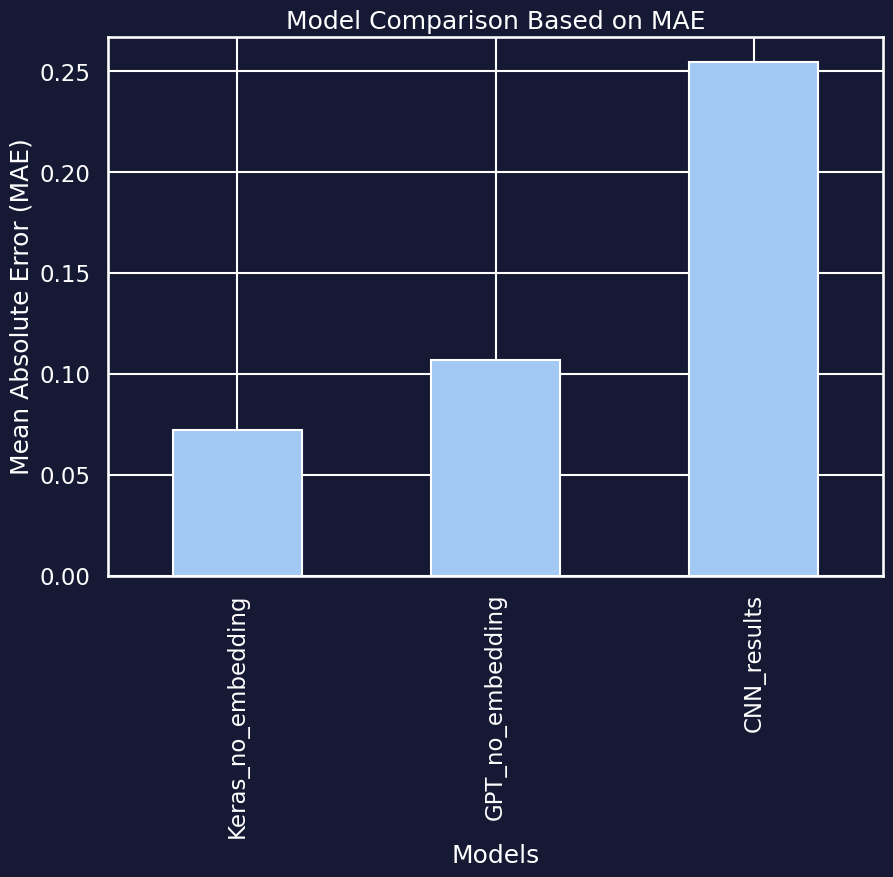

In [142]:
# Evaluate the current model with GPT-2 embeddings
model_results_GPT_no_embedding = evaluate_preds(y_true=y_test, y_pred=predictions_gpt2.flatten())  # Assuming predictions_gpt2 from the previous cell
print("Results with GPT-2 no embeddings:", model_results_GPT_no_embedding)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding
}).T  # Transpose the DataFrame for easier plotting

# Print the results for clarity
print(model_results)

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar", legend=False)
plt.title("Model Comparison Based on MAE")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(True)
plt.show()

In [143]:
model_results

mae       mse      rmse        mape      mase
CNN_results         0.254235  0.086976  0.294917  619.151855  0.764141
Keras_no_embedding  0.071917  0.008180  0.090446  157.196518  1.015549
GPT_no_embedding    0.106965  0.016670  0.129111  317.063263  0.895345

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 343ms/step - loss: 0.0160 - mae: 0.1039 - val_loss: 0.0133 - val_mae: 0.0952 - learning_rate: 1.0000e-05
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mae: 0.1009 - val_loss: 0.0131 - val_mae: 0.0942 - learning_rate: 1.0000e-05
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mae: 0.1044 - val_loss: 0.0127 - val_mae: 0.0926 - learning_rate: 1.0000e-05
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mae: 0.0972 - val_loss: 0.0123 - val_mae: 0.0908 - learning_rate: 1.0000e-05
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138 - mae: 0.0967 - val_loss: 0.0122 - val_mae: 0.0900 - learning_rate: 1.0000e-05
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mae: 0.0930 - val_loss: 0.0118 - val_mae: 0.0888 - learning_rate: 1.0000e-05
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mae: 0.0966 - val_loss: 0.0116 - val_mae: 0.0880 - learning_rate: 

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 557ms/step


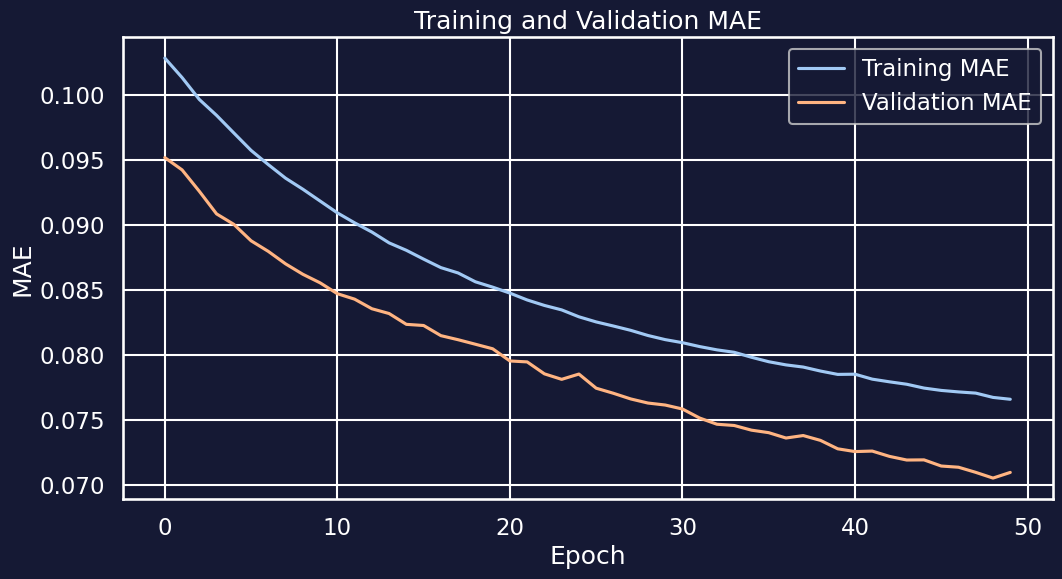

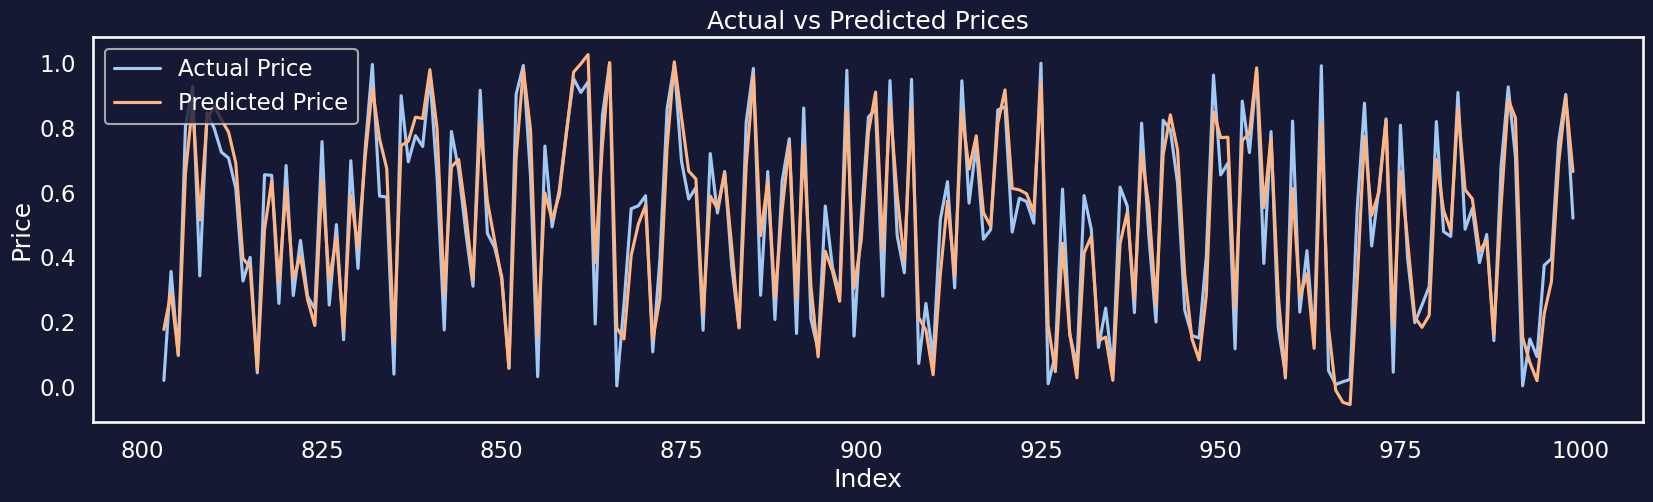

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 0.0085 - mae: 0.0758
Test Mean Absolute Error: 0.07710035890340805
Results with GPT-2 embeddings: {'mae': 0.07710036, 'mse': 0.008743633, 'rmse': 0.093507394, 'mape': 183.6803, 'mase': 0.99445236}
                         mae       mse      rmse        mape      mase
CNN_results         0.254235  0.086976  0.294917  619.151855  0.764141
Keras_no_embedding  0.071917  0.008180  0.090446  157.196518  1.015549
GPT_no_embedding    0.077100  0.008744  0.093507  183.680298  0.994452


<Figure size 1000x700 with 0 Axes>

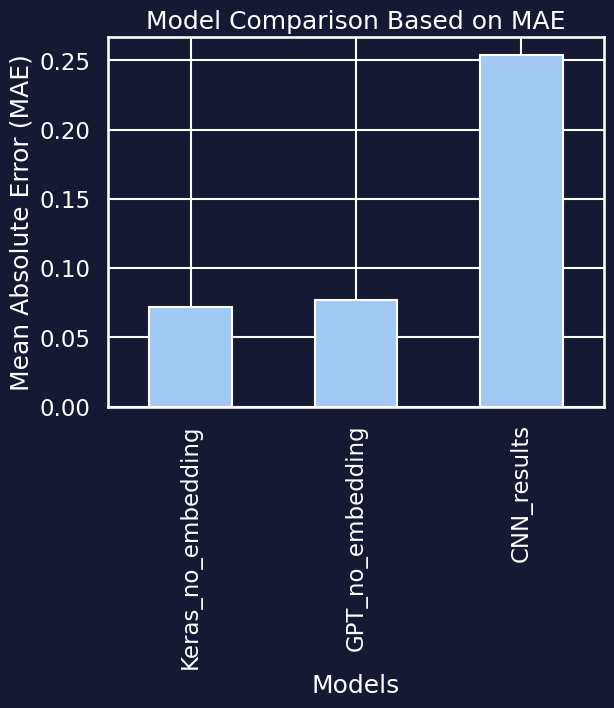

In [144]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

# Define learning rate and other hyperparameters
initial_learning_rate = 0.00001  # Lower learning rate for fine-tuning
batch_size = 32
epochs = 50

# Rebuild the combined model with GPT-2 embeddings and numerical features
combined_model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
                       loss='mean_squared_error',
                       metrics=['mae'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
# Fine-tune the model
history = combined_model.fit(
    [X_train, padded_corpus_train, attention_masks_train],
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Align the sizes of padded_corpus_test and attention_masks_test with X_test
padded_corpus_test_aligned = padded_corpus_test[:len(X_test)]
attention_masks_test_aligned = attention_masks_test[:len(X_test)]

# Make predictions on the aligned test set
predictions_gpt2 = combined_model.predict([X_test, padded_corpus_test_aligned, attention_masks_test_aligned])

# Plot training history to visualize improvement
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

# Flatten y_test for plotting
y_test_flat = y_test

# Plot predictions vs actual values
plt.figure(figsize=(20, 5))
plt.plot(y_test.index, y_test_flat, label="Actual Price", linestyle="-")
plt.plot(y_test.index, predictions_gpt2.flatten(), label="Predicted Price", linestyle="-")
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(False)
plt.show()

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([X_test, padded_corpus_test_aligned, attention_masks_test_aligned], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Evaluate the current model with GPT-2 embeddings
model_results_GPT_no_embedding = evaluate_preds(y_true=y_test_flat, y_pred=predictions_gpt2.flatten())
print("Results with GPT-2 embeddings:", model_results_GPT_no_embedding)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding
}).T  # Transpose the DataFrame for easier plotting

# Print the results for clarity
print(model_results)

# Sort model results by MAE and plot them
plt.figure(figsize=(10, 7))
model_results[["mae"]].sort_values(by="mae").plot(kind="bar", legend=False)
plt.title("Model Comparison Based on MAE")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(True)
plt.show()


In [145]:
model_results

mae       mse      rmse        mape      mase
CNN_results         0.254235  0.086976  0.294917  619.151855  0.764141
Keras_no_embedding  0.071917  0.008180  0.090446  157.196518  1.015549
GPT_no_embedding    0.077100  0.008744  0.093507  183.680298  0.994452

# GPT with text embedding

In [146]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(784, 784, 197, 197)

In [147]:
# prompt: write code fromhere with text embedding usng GPT model

# Assuming corpus, corpus_test, x_train, x_test, y_train, and y_test are already defined

# Tokenize and encode the text data
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2Model.from_pretrained("gpt2")

def encode_text(corpus):
  encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
  max_length = 50  # Adjust based on your requirements
  padded_corpus = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')
  return padded_corpus

padded_corpus_train = encode_text(train_news["Text"])
padded_corpus_test = encode_text(test_news["Text"])

# Extract embeddings from GPT-2
def extract_embeddings(padded_corpus):
  embeddings = []
  for sequence in padded_corpus:
    input_ids = tf.constant(sequence)[None, :]  # Batch size 1
    outputs = model(input_ids)
    last_hidden_states = outputs.last_hidden_state
    embedding = tf.reduce_mean(last_hidden_states, axis=1).numpy()  # Average over the sequence length
    embeddings.append(embedding.flatten())
  return np.array(embeddings)

train_embeddings = extract_embeddings(padded_corpus_train)
test_embeddings = extract_embeddings(padded_corpus_test)




All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [148]:
print("x_train shape:", x_train.shape)
print("train_embeddings shape:", train_embeddings.shape)
print("x_test shape:", x_test.shape)
print("test_embeddings shape:", test_embeddings.shape)


x_train shape: (784, 6)
train_embeddings shape: (784, 768)
x_test shape: (197, 6)
test_embeddings shape: (197, 768)


In [149]:
# Determine the minimum number of samples in test data
min_test_length = min(len(x_test), len(test_embeddings))

# Truncate test_embeddings to match x_test
x_test = x_test[:min_test_length]
test_embeddings = test_embeddings[:min_test_length]

# Combine numerical features and text embeddings
x_train_combined = np.concatenate([x_train, train_embeddings], axis=1)
x_test_combined = np.concatenate([x_test, test_embeddings], axis=1)

# Define and train a model (adjust architecture as needed)
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=x_train_combined.shape[1]))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(x_train_combined, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 16.0991 - mae: 3.3332 - val_loss: 3.2338 - val_mae: 1.7694
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2825 - mae: 0.9935 - val_loss: 0.3582 - val_mae: 0.5327
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2926 - mae: 0.4551 - val_loss: 0.1264 - val_mae: 0.2920
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1050 - mae: 0.2629 - val_loss: 0.1002 - val_mae: 0.2580
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0811 - mae: 0.2400 - val_loss: 0.0572 - val_mae: 0.2016
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0637 - mae: 0.2127 - val_loss: 0.0550 - val_mae: 0.1967
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0622 - mae: 0.2105 - val_loss: 0.0515 - val_mae: 0.1913
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0604 - mae: 0.2057 - val_loss: 0.0508 - val_mae: 0.1900
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0554 - mae

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151 - mae: 0.0980 
Test Mean Absolute Error: 0.09995434433221817


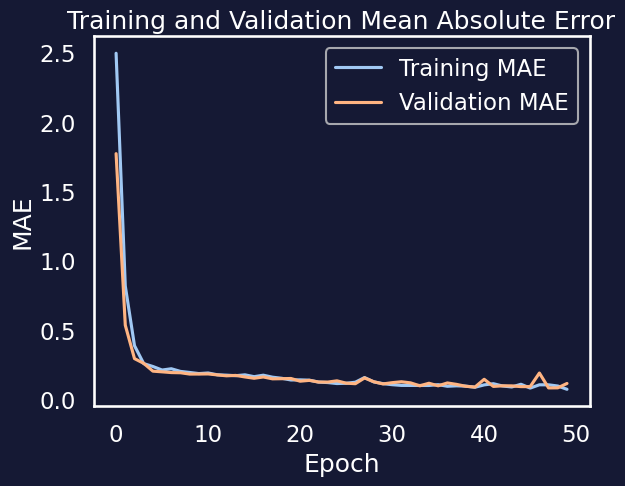

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [150]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set with combined features
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation Mean Absolute Error')
plt.show()

# Make predictions on the test set with combined features
predictions = model.predict(x_test_combined).flatten()


{'mae': 0.099954344, 'mse': 0.015853249, 'rmse': 0.12590969, 'mape': 377.14993, 'mase': 0.99450266}


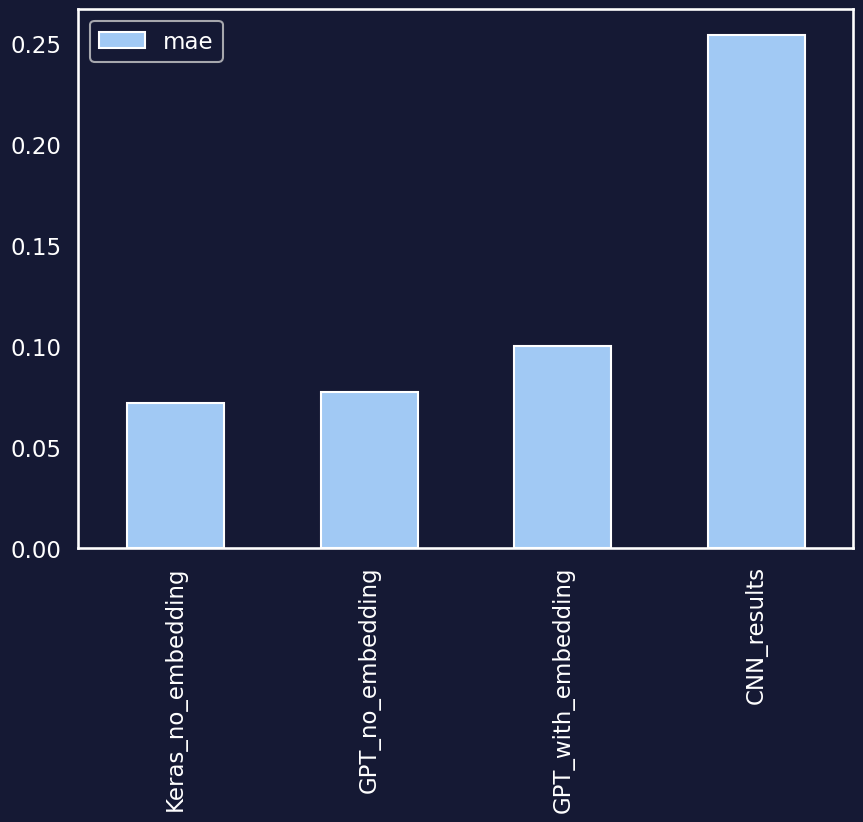

In [151]:
# Assuming evaluate_preds is a predefined function to evaluate predictions
model_results_with_embedding = evaluate_preds(y_true=y_test, y_pred=predictions)
print(model_results_with_embedding)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding
}).T  # Transpose the DataFrame for easier plotting

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

In [152]:
model_results

mae       mse      rmse        mape      mase
CNN_results         0.254235  0.086976  0.294917  619.151855  0.764141
Keras_no_embedding  0.071917  0.008180  0.090446  157.196518  1.015549
GPT_no_embedding    0.077100  0.008744  0.093507  183.680298  0.994452
GPT_with_embedding  0.099954  0.015853  0.125910  377.149933  0.994503

# BERT

In [153]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(784, 784, 197, 197)

In [154]:
X

MA7      MA20      20SD  upper_band  lower_band       EMA
19   0.354027  0.404906  0.274218    0.953342   -0.143529  0.434916
20   0.467803  0.433660  0.303770    1.041201   -0.173881  0.804300
21   0.529163  0.471646  0.308440    1.088527   -0.145234  0.846946
22   0.649057  0.493936  0.321201    1.136337   -0.148466  0.866918
23   0.667242  0.492053  0.322292    1.136637   -0.152532  0.487009
..        ...       ...       ...         ...         ...       ...
995  0.418635  0.439153  0.267398    0.973949   -0.095642  0.290096
996  0.377932  0.439079  0.267411    0.973900   -0.095743  0.359931
997  0.353580  0.467019  0.269959    1.006937   -0.072898  0.623799
998  0.381100  0.499598  0.281650    1.062897   -0.063701  0.810011
999  0.455209  0.510203  0.278024    1.066252   -0.045846  0.616724

[981 rows x 6 columns]

In [155]:
y

Value
19   0.303061
20   0.988992
21   0.868270
22   0.876904
23   0.297055
..        ...
995  0.374545
996  0.394849
997  0.755733
998  0.903117
999  0.520080

[981 rows x 1 columns]

In [156]:
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = X_test.to_numpy()
y_test  = y_test.to_numpy()

In [157]:
## feature matrix
X_feature_new = [np.asarray(x_train, dtype='int32')]

In [158]:
## feature matrix
X_feature_new_1 = [np.asarray(x_test, dtype='int32')]

In [159]:

## bert tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [160]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_train = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_train[0])

Padded Sequence: [ 101 2085 2009 2003 3760 2011 5717 2391 2274 2274 2809 2809 2048 5717
 2274 2028 2274 2698 5717 5717 2274 2274 2416 3157 1012  102    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [161]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_test = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_test[0])

Padded Sequence: [ 101 2085 2009 2003 3760 2011 5717 2391 2809 5717 2416 2416 2274 2809
 2698 2809 2274 5717 2093 5717 2093 5717 2028 2093 1012  102    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [162]:
# Check the number of samples in each dataset
print("Number of samples in x_test:", x_test.shape[0])
print("Number of samples in padded_corpus_test:", padded_corpus_test.shape[0])

Number of samples in x_test: 197
Number of samples in padded_corpus_test: 197


In [163]:
min_samples = min(x_test.shape[0], padded_corpus_test.shape[0])
# Trim or pad the datasets
x_test = x_test[:min_samples]
padded_corpus_test = padded_corpus_test[:min_samples]
# Now, attempt the concatenation again
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)
# Check the shape after concatenation
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_test_combined: (197, 56)


In [164]:

import numpy as np

# Assuming you have numerical features (X_train, X_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Merge numerical features and encoded text sequences for training set
x_train_combined = np.concatenate([x_train, padded_corpus_train], axis=1)

# Merge numerical features and encoded text sequences for testing set
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_train_combined: (784, 56)
Shape of x_test_combined: (197, 56)


In [165]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(784, 784, 197, 197)

# BERT with no text embedding

In [166]:
import tensorflow as tf
import transformers
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertModel.from_pretrained(model_name)

# Freeze the pre-trained BERT layers
bert_model.trainable = False

# BERT model input
bert_input = Input(shape=(max_length,), dtype=tf.int32, name="bert_input")

# Define a custom layer to use the BERT model
class BertFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BertFeatureExtractor, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        bert_outputs = self.bert_model(inputs)
        return bert_outputs.last_hidden_state

# Use the custom layer
bert_features = BertFeatureExtractor(bert_model)(bert_input)

# Flatten the BERT output
bert_output_flat = Flatten()(bert_features)

# Numerical input layer
your_numerical_feature_dim = 6  # Adjust based on your actual data
numerical_input = Input(shape=(your_numerical_feature_dim,), name="numerical_input")

# Concatenate BERT features with numerical features
combined_input = Concatenate()([bert_output_flat, numerical_input])

# Dense layers
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Define the combined model
combined_model = Model(inputs=[bert_input, numerical_input], outputs=output_layer)

# Compile the model with mean squared error loss for regression
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with combined inputs
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([padded_corpus_test, x_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([padded_corpus_test, x_test])

# Assuming evaluate_preds is a predefined function to evaluate predictions
bert_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(bert_model_results)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 47s 615ms/step - loss: 16.6992 - mae: 2.1595 - val_loss: 0.1958 - val_mae: 0.3580
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 0.6897 - mae: 0.7025 - val_loss: 0.3499 - val_mae: 0.5038
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.6472 - mae: 0.6764 - val_loss: 1.0460 - val_mae: 0.9507
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 1.2057 - mae: 0.9445 - val_loss: 0.5215 - val_mae: 0.6137
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.3798 - mae: 0.5135 - val_loss: 0.3967 - val_mae: 0.5605
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.2634 - mae: 0.4199 - val_loss: 0.3329 - val_mae: 0.4987
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.2843 - mae: 0.4520 - val_loss: 0.1103 - val_mae: 0.2668
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.3442 - mae: 0.4852 - val_loss: 0.1598 - val_mae: 0.3316
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0

In [167]:
!pip install transformers

import transformers
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertModel.from_pretrained(model_name)

# Freeze the pre-trained BERT layers
bert_model.trainable = False

# BERT model input
max_length = 50  # Adjust max_length according to your data
bert_input = Input(shape=(max_length,), dtype=tf.int32, name="bert_input")

# Define a custom layer to use the BERT model
class BertFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BertFeatureExtractor, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        bert_outputs = self.bert_model(inputs)
        return bert_outputs.last_hidden_state

# Define a custom layer to zero out BERT embeddings
class ZeroOutEmbeddings(tf.keras.layers.Layer):
    def __init__(self):
        super(ZeroOutEmbeddings, self).__init__()

    def call(self, inputs):
        return tf.zeros_like(inputs)

# Use the custom layer for BERT feature extraction and zeroing out embeddings
bert_features = BertFeatureExtractor(bert_model)(bert_input)
zeroed_bert_features = ZeroOutEmbeddings()(bert_features)

# Flatten the zeroed BERT output
bert_output_flat = Flatten()(zeroed_bert_features)

# Numerical input layer
your_numerical_feature_dim = x_train.shape[1]  # Adjust according to your data
numerical_input = Input(shape=(your_numerical_feature_dim,), name="numerical_input")

# Concatenate zeroed BERT features with numerical features
combined_input = Concatenate()([bert_output_flat, numerical_input])

# Dense layers
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Define the combined model
combined_model = Model(inputs=[bert_input, numerical_input], outputs=output_layer)

# Compile the model with mean squared error loss for regression
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with combined inputs
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([padded_corpus_test, x_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([padded_corpus_test, x_test])

# Assuming evaluate_preds is a predefined function to evaluate predictions
bert_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(bert_model_results)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 244ms/step - loss: 0.1731 - mae: 0.3391 - val_loss: 0.0536 - val_mae: 0.1966
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0507 - mae: 0.1892 - val_loss: 0.0255 - val_mae: 0.1373
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0233 - mae: 0.1255 - val_loss: 0.0115 - val_mae: 0.0882
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mae: 0.0820 - val_loss: 0.0074 - val_mae: 0.0714
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mae: 0.0773 - val_loss: 0.0077 - val_mae: 0.0726
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mae: 0.0798 - val_loss: 0.0076 - val_mae: 0.0733
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0087 - mae: 0.0781 - val_loss: 0.0065 - val_mae: 0.0678
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mae: 0.0763 - val_loss: 0.0070 - val_mae: 0.0703
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - ma

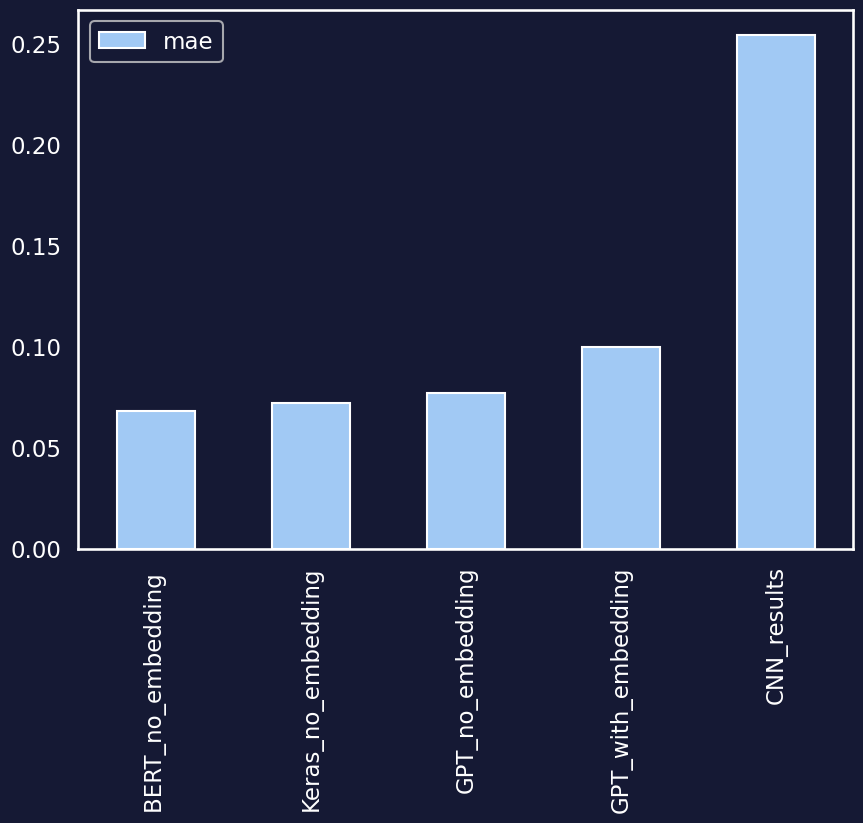

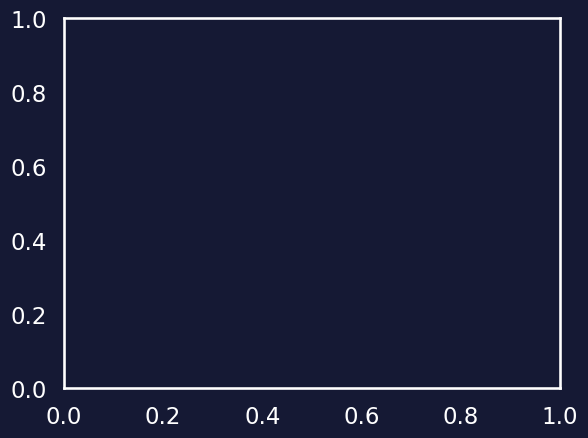

In [168]:
# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding,
    "BERT_no_embedding ": bert_model_results
}).T  # Transpose the DataFrame for easier plotting


# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()
plt.grid(False)

# BERT with text embedding

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input_ids            │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_attention_masks      │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_feature_extractor_3  │ (None, 50, 768)        │              0 │ text_input_ids[0][0],  │
│ (BERTFeatureExtractor)    │                        │                │ text_attention_masks[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numerical_input           │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 38400)          │              0 │ bert_feature_extracto… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 38406)          │              0 │ numerical_input[0][0], │
│ (Concatenate)             │                        │                │ flatten_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 256)            │      9,832,192 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_31 (Dense)          │ (None, 128)            │         32,896 │ dense_30[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_32 (Dense)          │ (None, 64)             │          8,256 │ dense_31[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_33 (Dense)          │ (None, 1)              │             65 │ dense_32[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,873,409 (37.66 MB)

 Trainable params: 9,873,409 (37.66 MB)

 Non-trainable params: 0 (0.00 B)

x_test_np shape: (197, 6)
padded_corpus_test_np shape: (197, 50)
attention_masks_test_np shape: (197, 50)
y_test shape: (197, 1)
Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - loss: 100.0618 - mae: 4.3969 - val_loss: 0.7627 - val_mae: 0.8192
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - loss: 0.6245 - mae: 0.6944 - val_loss: 0.1821 - val_mae: 0.3523
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.1415 - mae: 0.3101 - val_loss: 0.0765 - val_mae: 0.2246
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0857 - mae: 0.2276 - val_loss: 0.2695 - val_mae: 0.4698
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.1301 - mae: 0.2947 - val_loss: 0.3257 - val_mae: 0.5076
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.3661 - mae: 0.5469
Test Mean Absolute Error: 0.5253116488456726


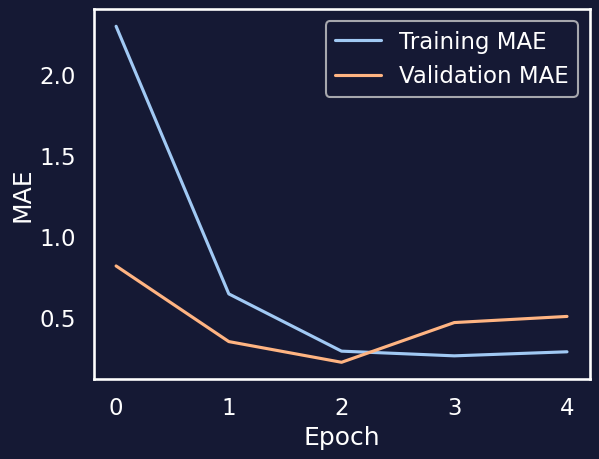

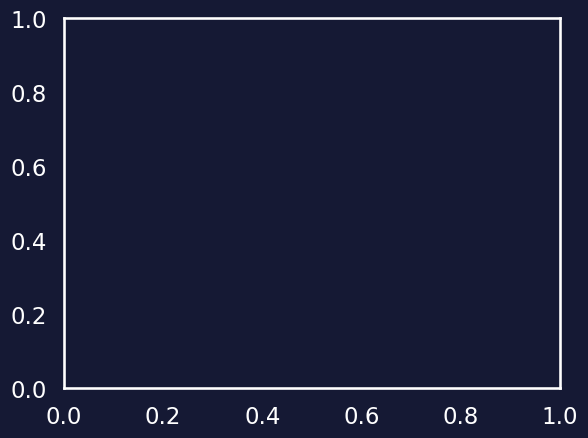

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Concatenate, Input
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Assuming your data is already in numpy format
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)
bert_model = TFBertModel.from_pretrained(model_name)

# Tokenize and pad the training and testing text data
encoded_corpus_train = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
encoded_corpus_test = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

max_length = 50  # Maximum length for padding/truncating sequences
padded_corpus_train = pad_sequences(encoded_corpus_train, maxlen=max_length, padding='post', truncating='post')
padded_corpus_test = pad_sequences(encoded_corpus_test, maxlen=max_length, padding='post', truncating='post')

# Create attention masks for the text data
attention_masks_train = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_train])
attention_masks_test = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_test])

# Define input shapes
numerical_input_shape = x_train.shape[1]
text_input_shape = max_length

# Define the custom layer for BERT
class BERTFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BERTFeatureExtractor, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        input_ids, attention_masks = inputs
        outputs = self.bert_model(input_ids, attention_mask=attention_masks)
        return outputs.last_hidden_state

# Define the numerical input layer
numerical_input = Input(shape=(numerical_input_shape,), name="numerical_input")

# Define the text input layers
text_input_ids = Input(shape=(text_input_shape,), dtype=tf.int32, name="text_input_ids")
text_attention_masks = Input(shape=(text_input_shape,), dtype=tf.float32, name="text_attention_masks")

# Use the custom layer to get BERT features
bert_features = BERTFeatureExtractor(bert_model)([text_input_ids, text_attention_masks])

# Flatten the BERT output
text_embedding_flat = Flatten()(bert_features)

# Concatenate numerical and text features
combined_input = Concatenate()([numerical_input, text_embedding_flat])

# Dense layers for regression
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Create the combined model
combined_model = Model(inputs=[numerical_input, text_input_ids, text_attention_masks], outputs=output_layer)

# Compile the model
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
combined_model.summary()

# Convert inputs to NumPy arrays
x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
padded_corpus_train_np = np.array(padded_corpus_train)
padded_corpus_test_np = np.array(padded_corpus_test)
attention_masks_train_np = np.array(attention_masks_train)
attention_masks_test_np = np.array(attention_masks_test)

# Print shapes to debug the issue
print(f'x_test_np shape: {x_test_np.shape}')
print(f'padded_corpus_test_np shape: {padded_corpus_test_np.shape}')
print(f'attention_masks_test_np shape: {attention_masks_test_np.shape}')
print(f'y_test shape: {y_test.shape}')

# Trimming padded_corpus_test_np and attention_masks_test_np to match x_test_np and y_test
padded_corpus_test_np = padded_corpus_test_np[:x_test_np.shape[0]]
attention_masks_test_np = attention_masks_test_np[:x_test_np.shape[0]]

# Ensure the number of samples matches across all inputs
assert x_train_np.shape[0] == padded_corpus_train_np.shape[0] == attention_masks_train_np.shape[0] == y_train.shape[0], "Train input shapes do not match"
assert x_test_np.shape[0] == padded_corpus_test_np.shape[0] == attention_masks_test_np.shape[0] == y_test.shape[0], "Test input shapes do not match"

# Train the model
history = combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()
plt.grid(False)


7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step
{'mae': 0.52531165, 'mse': 0.33844098, 'rmse': 0.58175683, 'mape': 424.2148, 'mase': 1.588454}


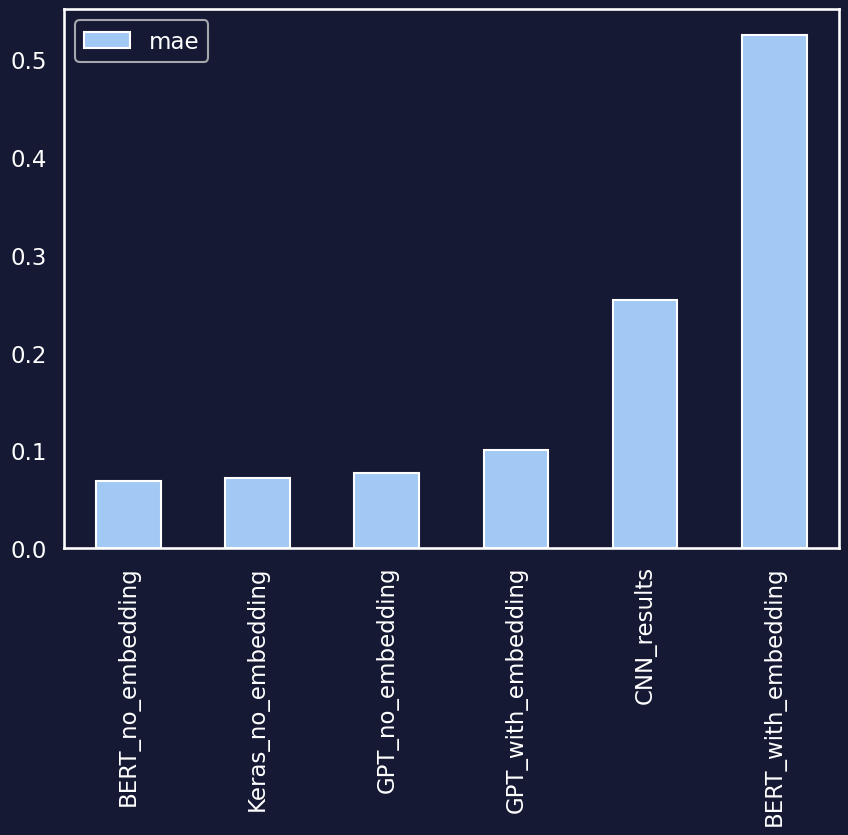

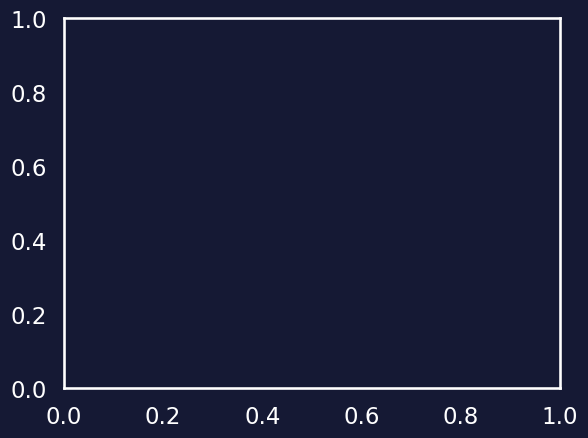

In [170]:
# Predict on the test set
predictions_BERT = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(BERT_dense_model_results)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results
}).T  # Transpose the DataFrame for easier plotting




# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()
plt.grid(False)

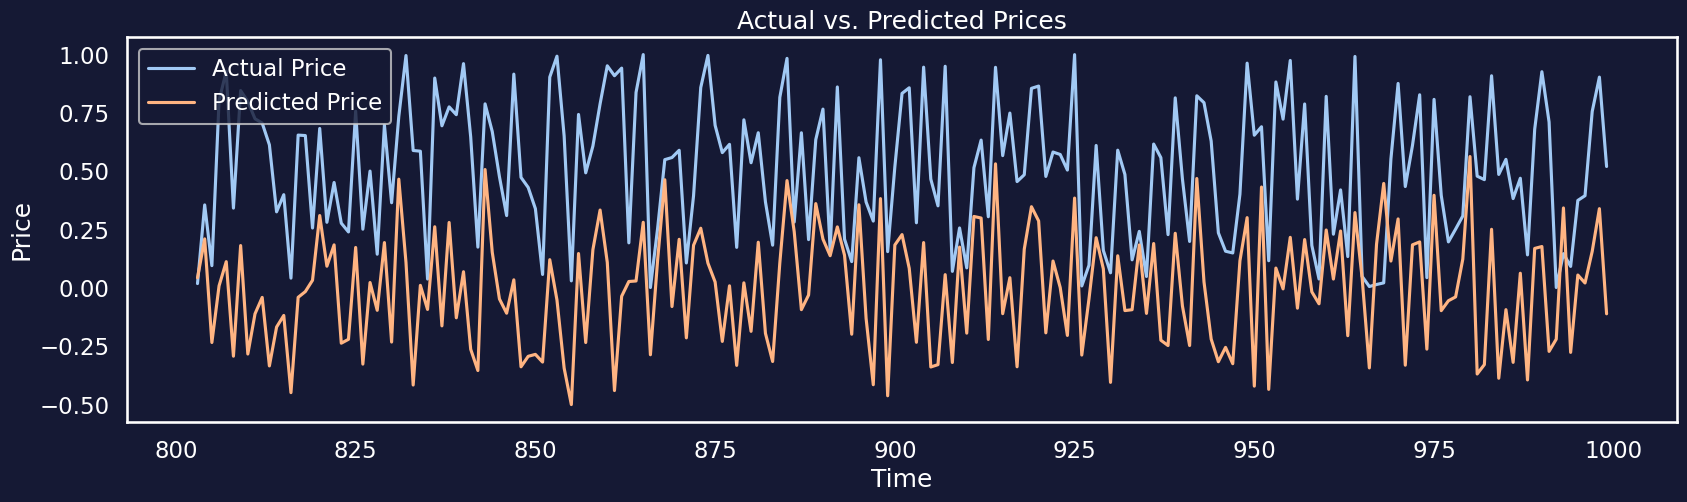

mae       mse      rmse        mape      mase
CNN_results          0.254235  0.086976  0.294917  619.151855  0.764141
Keras_no_embedding   0.071917  0.008180  0.090446  157.196518  1.015549
GPT_no_embedding     0.077100  0.008744  0.093507  183.680298  0.994452
GPT_with_embedding   0.099954  0.015853  0.125910  377.149933  0.994503
BERT_no_embedding    0.068265  0.007320  0.085559  138.391205  0.206421
BERT_with_embedding  0.525312  0.338441  0.581757  424.214813  1.588454

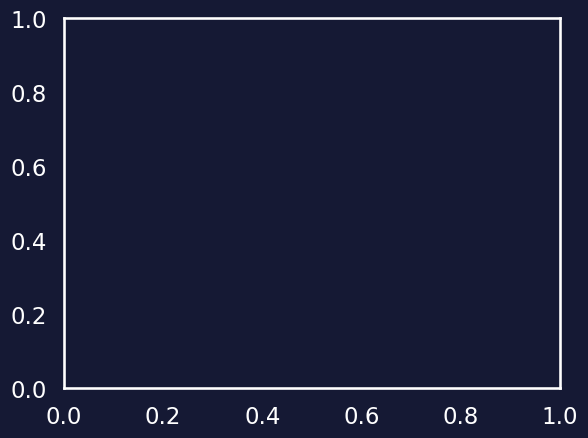

In [171]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT, format="-", label="Predicted Price")
plt.show()
plt.grid(False)


# Compare model results
model_results


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 512)                 │      19,664,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,836,929 (75.67 MB)

 Trainable params: 19,836,929 (75.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - loss: 121.3465 - mae: 5.3514 - val_loss: 4.6972 - val_mae: 2.1426
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 2.0206 - mae: 1.1814 - val_loss: 0.1889 - val_mae: 0.3515
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4831 - mae: 0.5494 - val_loss: 0.1470 - val_mae: 0.3127
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1425 - mae: 0.3029 - val_loss: 0.1601 - val_mae: 0.3123
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1986 - mae: 0.3588 - val_loss: 0.2312 - val_mae: 0.4131
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2484 - mae: 0.4357
Test Mean Absolute Error: 0.41833725571632385


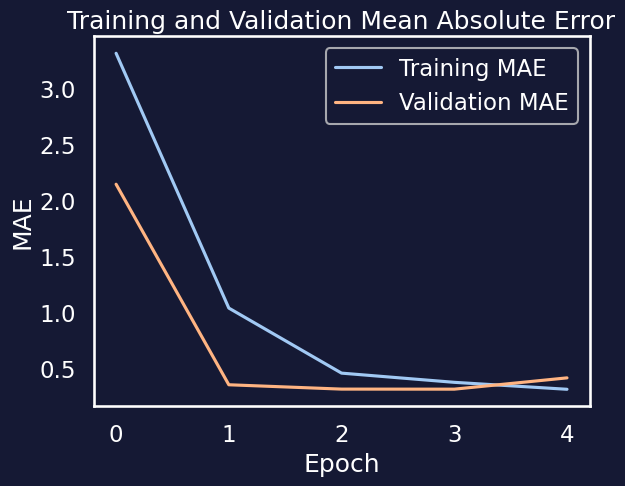

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming your data is already in numpy format
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)
bert_model = TFBertModel.from_pretrained(model_name)

# Tokenize and pad the training and testing text data
encoded_corpus_train = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
encoded_corpus_test = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

max_length = 50  # Maximum length for padding/truncating sequences
padded_corpus_train = pad_sequences(encoded_corpus_train, maxlen=max_length, padding='post', truncating='post')
padded_corpus_test = pad_sequences(encoded_corpus_test, maxlen=max_length, padding='post', truncating='post')

# Create attention masks for the text data
attention_masks_train = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_train])
attention_masks_test = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_test])

# Adjust the number of samples to match between x_test and test BERT embeddings if needed
if x_test.shape[0] != padded_corpus_test.shape[0]:
    print("Adjusting the number of samples to match between x_test and test BERT embeddings.")
    min_samples = min(x_test.shape[0], padded_corpus_test.shape[0])
    x_test = x_test[:min_samples]
    padded_corpus_test = padded_corpus_test[:min_samples]
    attention_masks_test = attention_masks_test[:min_samples]
    y_test = y_test[:min_samples]

# Define the custom layer for BERT feature extraction
class BERTFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BERTFeatureExtractor, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        input_ids, attention_masks = inputs
        outputs = self.bert_model(input_ids, attention_mask=attention_masks)
        return outputs.last_hidden_state

# Extract BERT features for training and testing datasets
bert_feature_extractor = BERTFeatureExtractor(bert_model)

# Compute BERT embeddings for train and test sets
train_bert_embeddings = bert_feature_extractor([padded_corpus_train, attention_masks_train])
test_bert_embeddings = bert_feature_extractor([padded_corpus_test, attention_masks_test])

# Convert TensorFlow tensors to numpy arrays
train_bert_embeddings_np = train_bert_embeddings.numpy()
test_bert_embeddings_np = test_bert_embeddings.numpy()

# Flatten BERT embeddings to combine with numerical inputs
train_bert_embeddings_flat = train_bert_embeddings_np.reshape(train_bert_embeddings_np.shape[0], -1)
test_bert_embeddings_flat = test_bert_embeddings_np.reshape(test_bert_embeddings_np.shape[0], -1)

# Combine numerical features with BERT embeddings
x_train_combined = np.concatenate([x_train, train_bert_embeddings_flat], axis=1)
x_test_combined = np.concatenate([x_test, test_bert_embeddings_flat], axis=1)

# Define a Sequential model
model = Sequential([
    Dense(512, activation='relu', input_dim=x_train_combined.shape[1]),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(x_train_combined, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation Mean Absolute Error')
plt.show()


In [173]:
# Step 1: Recalculate BERT embeddings for the test data (if not already done)
test_bert_embeddings = bert_feature_extractor([padded_corpus_test, attention_masks_test])

# Convert TensorFlow tensors to numpy arrays
test_bert_embeddings_np = test_bert_embeddings.numpy()

# Flatten BERT embeddings to combine with numerical inputs
test_bert_embeddings_flat = test_bert_embeddings_np.reshape(test_bert_embeddings_np.shape[0], -1)

# Step 2: Combine numerical features with BERT embeddings (same as during training)
x_test_combined = np.concatenate([x_test, test_bert_embeddings_flat], axis=1)

# Step 3: Make predictions using the combined test set
predictions_BERT = model.predict(x_test_combined)

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT.flatten())
print(f'BERT + Dense Model Results: {BERT_dense_model_results}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
BERT + Dense Model Results: {'mae': 0.41833726, 'mse': 0.23035976, 'rmse': 0.4799581, 'mape': 175.2735, 'mase': 1.3570367}


Model Comparison Results:
                          mae       mse      rmse        mape      mase
CNN_results          0.254235  0.086976  0.294917  619.151855  0.764141
Keras_no_embedding   0.071917  0.008180  0.090446  157.196518  1.015549
GPT_no_embedding     0.077100  0.008744  0.093507  183.680298  0.994452
GPT_with_embedding   0.099954  0.015853  0.125910  377.149933  0.994503
BERT_no_embedding    0.068265  0.007320  0.085559  138.391205  0.206421
BERT_with_embedding  0.418337  0.230360  0.479958  175.273499  1.357037


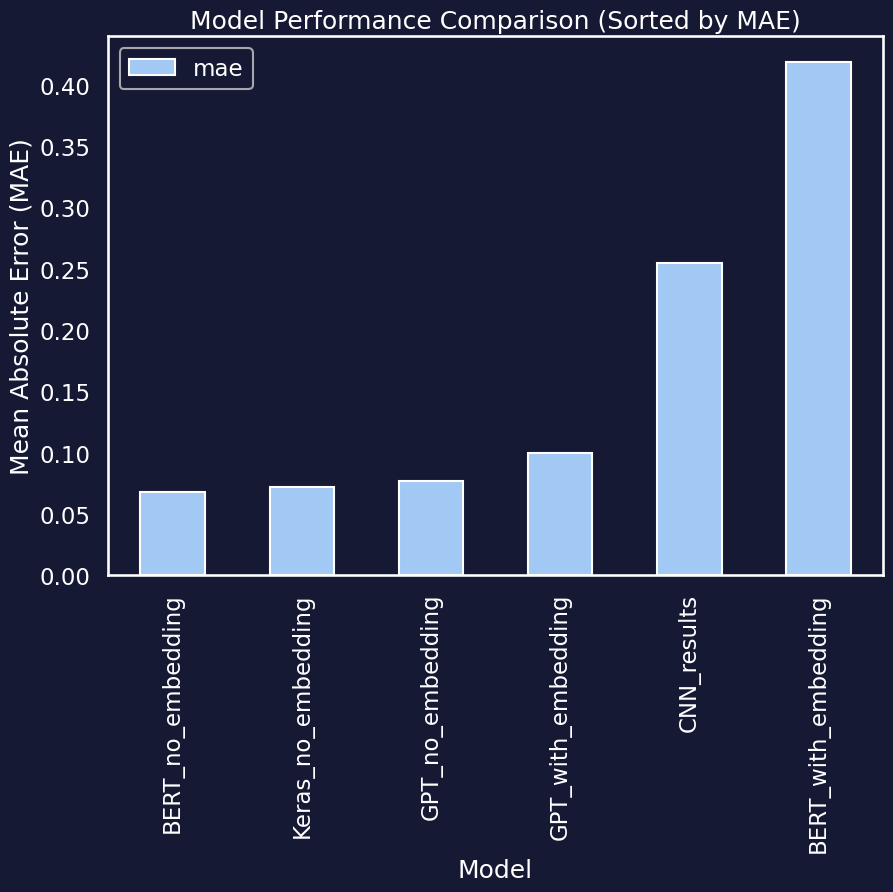

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results
}).T  # Transpose the DataFrame for easier plotting


# Print out all model results for comparison
print("Model Comparison Results:")
print(model_results)

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.title("Model Performance Comparison (Sorted by MAE)")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(False)
plt.show()


In [175]:
print(f"x_test shape: {x_test.shape}")
print(f"padded_corpus_test shape: {padded_corpus_test.shape}")
print(f"attention_masks_test shape: {attention_masks_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_test shape: (197, 6)
padded_corpus_test shape: (197, 50)
attention_masks_test shape: (197, 50)
y_test shape: (197, 1)


In [176]:
min_samples = len(x_test)  # or len(y_test), since they are equal in this case


In [177]:
# Adjust the arrays to match the minimum number of samples
padded_corpus_test = padded_corpus_test[:min_samples]
attention_masks_test = attention_masks_test[:min_samples]
y_test = y_test[:min_samples]


In [178]:
print(f"x_test shape after adjustment: {x_test.shape}")
print(f"padded_corpus_test shape after adjustment: {padded_corpus_test.shape}")
print(f"attention_masks_test shape after adjustment: {attention_masks_test.shape}")
print(f"y_test shape after adjustment: {y_test.shape}")


x_test shape after adjustment: (197, 6)
padded_corpus_test shape after adjustment: (197, 50)
attention_masks_test shape after adjustment: (197, 50)
y_test shape after adjustment: (197, 1)


Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input_ids            │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_attention_masks      │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numerical_input           │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer (BertLayer)    │ (None, 768)            │              0 │ text_input_ids[0][0],  │
│                           │                        │                │ text_attention_masks[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 774)            │              0 │ numerical_input[0][0], │
│ (Concatenate)             │                        │                │ bert_layer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_39 (Dense)          │ (None, 256)            │        198,400 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_40 (Dense)          │ (None, 128)            │         32,896 │ dense_39[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_41 (Dense)          │ (None, 64)             │          8,256 │ dense_40[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_42 (Dense)          │ (None, 1)              │             65 │ dense_41[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 239,617 (936.00 KB)

 Trainable params: 239,617 (936.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 0.1693 - mae: 0.3335 - val_loss: 0.0641 - val_mae: 0.2157
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 102ms/step - loss: 0.0739 - mae: 0.2357 - val_loss: 0.0539 - val_mae: 0.1973
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.0632 - mae: 0.2096 - val_loss: 0.0545 - val_mae: 0.1944
Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - loss: 0.0524 - mae: 0.1944 - val_loss: 0.0494 - val_mae: 0.1882
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - loss: 0.0491 - mae: 0.1880 - val_loss: 0.0490 - val_mae: 0.1870
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0486 - mae: 0.1883 - val_loss: 0.0492 - val_mae: 0.1861
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0499 - mae: 0.1924 - val_loss: 0.0486 - val_mae: 0.1847
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0491 - mae: 0.1880 - val_loss: 0.0482 - val_mae: 0.1841
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0520 - mae: 0.1930
Te

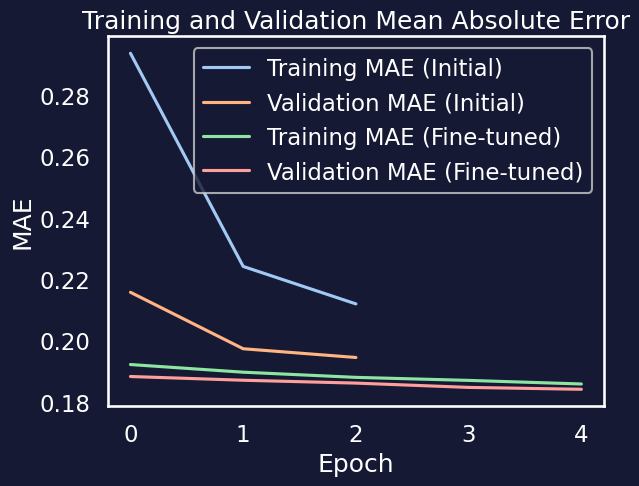

7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step
{'mae': 0.19490452, 'mse': 0.052287985, 'rmse': 0.22866565, 'mape': 458.02246, 'mase': 0.58935845}


In [179]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Layer
from tensorflow.keras.models import Model

# Create a custom Keras Layer to handle the BERT model
class BertLayer(Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert_model = bert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert_model(input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state[:, 0, :]  # Extract the [CLS] token embedding

# Define input shapes
numerical_input_shape = x_train.shape[1]
text_input_shape = max_length

# Define the numerical input layer
numerical_input = Input(shape=(numerical_input_shape,), name="numerical_input")

# Define the text input layers
text_input_ids = Input(shape=(text_input_shape,), dtype=tf.int32, name="text_input_ids")
text_attention_masks = Input(shape=(text_input_shape,), dtype=tf.float32, name="text_attention_masks")

# Apply the custom BERT layer to get the embeddings
bert_embeddings = BertLayer(bert_model)([text_input_ids, text_attention_masks])

# Concatenate numerical and text features
combined_input = Concatenate()([numerical_input, bert_embeddings])

# Dense layers for regression
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Create the combined model
combined_model = Model(inputs=[numerical_input, text_input_ids, text_attention_masks], outputs=output_layer)

# Freeze BERT layers initially
for layer in bert_model.layers:
    layer.trainable = False

# Compile the model
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
combined_model.summary()

# Train the model with frozen BERT layers
history = combined_model.fit(
    [x_train, padded_corpus_train, attention_masks_train],
    y_train,
    epochs=3,
    batch_size=32,
    validation_split=0.2
)

# Unfreeze BERT layers for fine-tuning
for layer in bert_model.layers:
    layer.trainable = True

# Recompile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)  # Adjust learning rate as needed
combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fine-tune the model
history_fine_tune = combined_model.fit(
    [x_train, padded_corpus_train, attention_masks_train],
    y_train,
    epochs=5,  # Adjust epochs for fine-tuning
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test, padded_corpus_test, attention_masks_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE (Initial)')
plt.plot(history.history['val_mae'], label='Validation MAE (Initial)')
plt.plot(history_fine_tune.history['mae'], label='Training MAE (Fine-tuned)')
plt.plot(history_fine_tune.history['val_mae'], label='Validation MAE (Fine-tuned)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation Mean Absolute Error')
plt.show()

# Predict on the test set
predictions_BERT = combined_model.predict([x_test, padded_corpus_test, attention_masks_test])

# Evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(BERT_dense_model_results)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 0.0483 - mae: 0.1876 - val_loss: 0.0480 - val_mae: 0.1836
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - loss: 0.0484 - mae: 0.1859 - val_loss: 0.0475 - val_mae: 0.1836
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0487 - mae: 0.1876 - val_loss: 0.0477 - val_mae: 0.1834
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0475 - mae: 0.1846 - val_loss: 0.0479 - val_mae: 0.1831
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0498 - mae: 0.1911 - val_loss: 0.0476 - val_mae: 0.1830
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0455 - mae: 0.1820 - val_loss: 0.0475 - val_mae: 0.1829
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0447 - mae: 0.1781 - val_loss: 0.0475 - val_mae: 0.1829
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0477 - mae: 0.1847 - val_loss: 0.0477 - val_mae: 0.1825
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - los

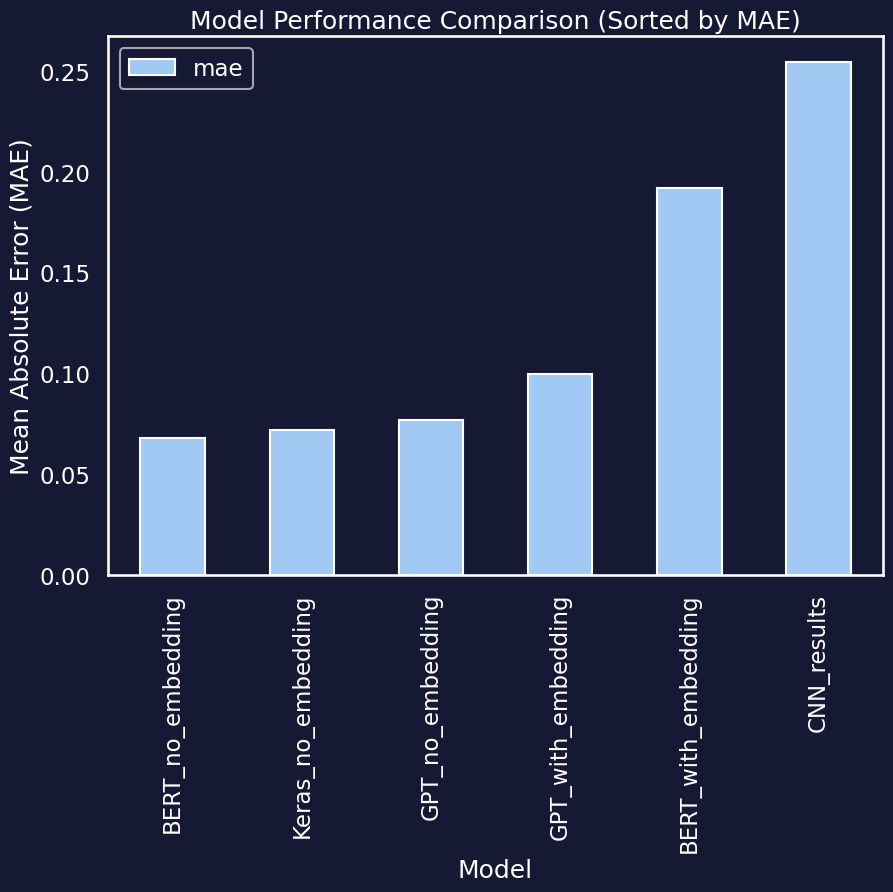

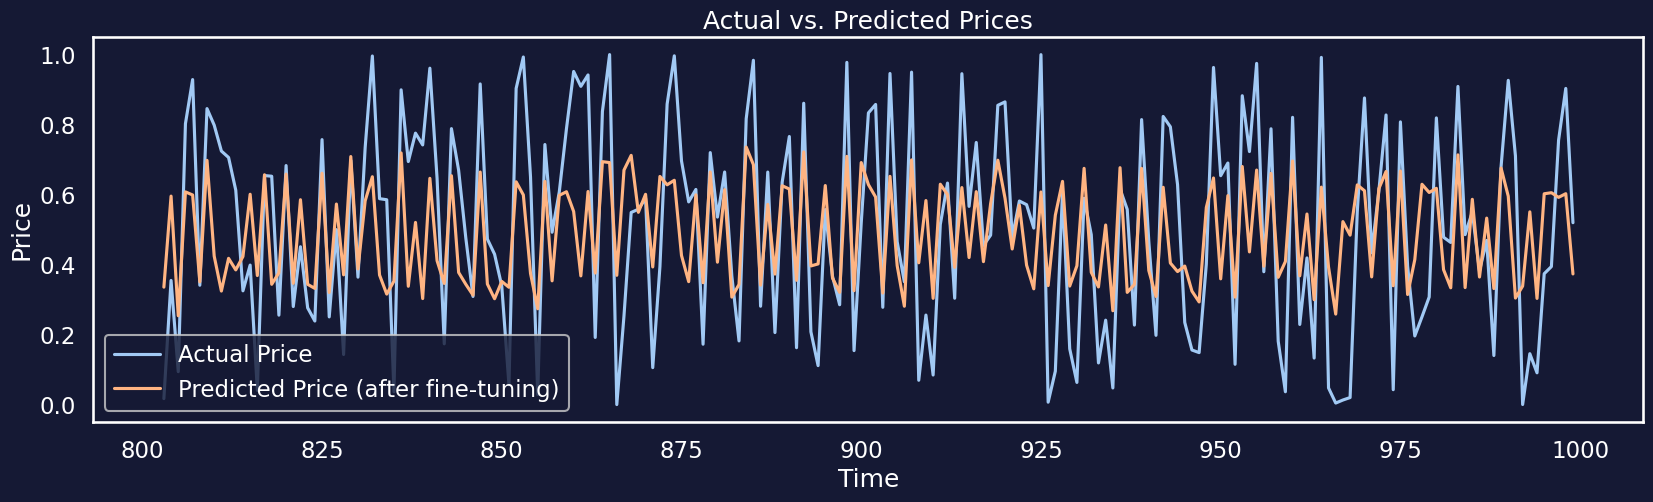

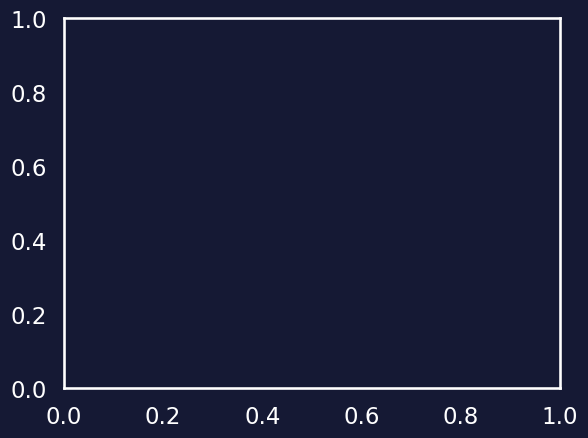

In [180]:
# Fine-tuning the BERT model
# Assuming you have already loaded the BERT model and tokenizer, and prepared your training and test datasets

# Freeze the first few layers of the BERT model to improve training efficiency
for layer in bert_model.layers[:6]:
    layer.trainable = False

# Compile the model with a lower learning rate for fine-tuning
combined_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-6), loss='mean_squared_error', metrics=['mae'])

# Train the model for a few more epochs with the new learning rate
history = combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the fine-tuned model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error after fine-tuning: {test_mae}')

# Predict on the test set with the fine-tuned model
predictions_BERT_fine_tuned = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results_fine_tuned = evaluate_preds(y_true=y_test, y_pred=predictions_BERT_fine_tuned)
print(BERT_dense_model_results_fine_tuned)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results_fine_tuned
}).T  # Transpose the DataFrame for easier plotting


# Print out all model results for comparison
print("Model Comparison Results:")
print(model_results)

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.title("Model Performance Comparison (Sorted by MAE)")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(False)
plt.show()

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT_fine_tuned, format="-", label="Predicted Price (after fine-tuning)")
plt.show()
plt.grid(False)


In [181]:
model_results

mae       mse      rmse        mape      mase
CNN_results          0.254235  0.086976  0.294917  619.151855  0.764141
Keras_no_embedding   0.071917  0.008180  0.090446  157.196518  1.015549
GPT_no_embedding     0.077100  0.008744  0.093507  183.680298  0.994452
GPT_with_embedding   0.099954  0.015853  0.125910  377.149933  0.994503
BERT_no_embedding    0.068265  0.007320  0.085559  138.391205  0.206421
BERT_with_embedding  0.191827  0.050961  0.225744  454.471802  0.580054

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
BERT + Dense Model Results: {'mae': 0.41833726, 'mse': 0.23035976, 'rmse': 0.4799581, 'mape': 175.2735, 'mase': 1.3570367}
Model Comparison Results:
                          mae       mse      rmse        mape      mase
CNN_results          0.254235  0.086976  0.294917  619.151855  0.764141
Keras_no_embedding   0.071917  0.008180  0.090446  157.196518  1.015549
GPT_no_embedding     0.077100  0.008744  0.093507  183.680298  0.994452
GPT_with_embedding   0.099954  0.015853  0.125910  377.149933  0.994503
BERT_no_embedding    0.068265  0.007320  0.085559  138.391205  0.206421
BERT_with_embedding  0.418337  0.230360  0.479958  175.273499  1.357037


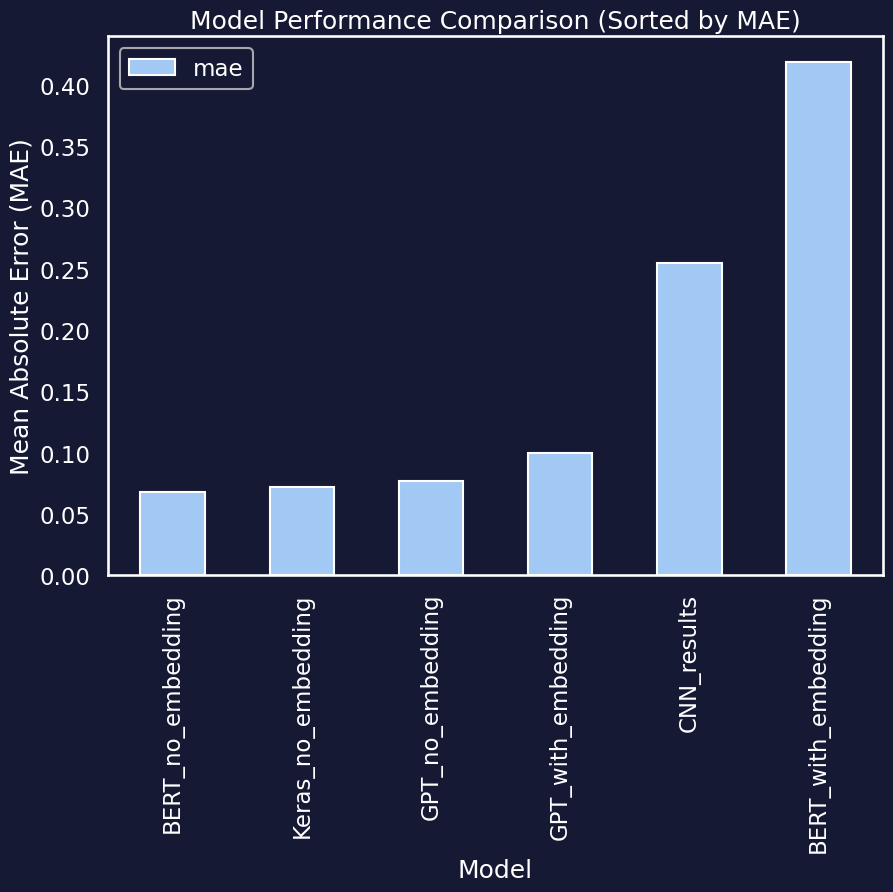

x_test shape: (197, 6)
padded_corpus_test shape: (197, 50)
attention_masks_test shape: (197, 50)
y_test shape: (197, 1)
x_test shape after adjustment: (197, 6)
padded_corpus_test shape after adjustment: (197, 50)
attention_masks_test shape after adjustment: (197, 50)
y_test shape after adjustment: (197, 1)


In [182]:
# prompt: write further code from here

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Step 1: Recalculate BERT embeddings for the test data (if not already done)
test_bert_embeddings = bert_feature_extractor([padded_corpus_test, attention_masks_test])

# Convert TensorFlow tensors to numpy arrays
test_bert_embeddings_np = test_bert_embeddings.numpy()

# Flatten BERT embeddings to combine with numerical inputs
test_bert_embeddings_flat = test_bert_embeddings_np.reshape(test_bert_embeddings_np.shape[0], -1)

# Step 2: Combine numerical features with BERT embeddings (same as during training)
x_test_combined = np.concatenate([x_test, test_bert_embeddings_flat], axis=1)

# Step 3: Make predictions using the combined test set
predictions_BERT = model.predict(x_test_combined)

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT.flatten())
print(f'BERT + Dense Model Results: {BERT_dense_model_results}')


# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results,
}).T  # Transpose the DataFrame for easier plotting


# Print out all model results for comparison
print("Model Comparison Results:")
print(model_results)

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.title("Model Performance Comparison (Sorted by MAE)")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(False)
plt.show()

print(f"x_test shape: {x_test.shape}")
print(f"padded_corpus_test shape: {padded_corpus_test.shape}")
print(f"attention_masks_test shape: {attention_masks_test.shape}")
print(f"y_test shape: {y_test.shape}")

min_samples = len(x_test)  # or len(y_test), since they are equal in this case

# Adjust the arrays to match the minimum number of samples
padded_corpus_test = padded_corpus_test[:min_samples]
attention_masks_test = attention_masks_test[:min_samples]
y_test = y_test[:min_samples]

print(f"x_test shape after adjustment: {x_test.shape}")
print(f"padded_corpus_test shape after adjustment: {padded_corpus_test.shape}")
print(f"attention_masks_test shape after adjustment: {attention_masks_test.shape}")
print(f"y_test shape after adjustment: {y_test.shape}")


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - loss: 0.0455 - mae: 0.1796 - val_loss: 0.0474 - val_mae: 0.1821
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 224ms/step - loss: 0.0482 - mae: 0.1854 - val_loss: 0.0468 - val_mae: 0.1812
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - loss: 0.0435 - mae: 0.1760 - val_loss: 0.0469 - val_mae: 0.1804
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - loss: 0.0458 - mae: 0.1808 - val_loss: 0.0468 - val_mae: 0.1798
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - loss: 0.0445 - mae: 0.1786 - val_loss: 0.0464 - val_mae: 0.1795
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - loss: 0.0441 - mae: 0.1778 - val_loss: 0.0471 - val_mae: 0.1795
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - loss: 0.0443 - mae: 0.1772 - val_loss: 0.0462 - val_mae: 0.1782
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - loss: 0.0430 - mae: 0.1731 - val_loss: 0.0460 - val_mae: 0.1777
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - los

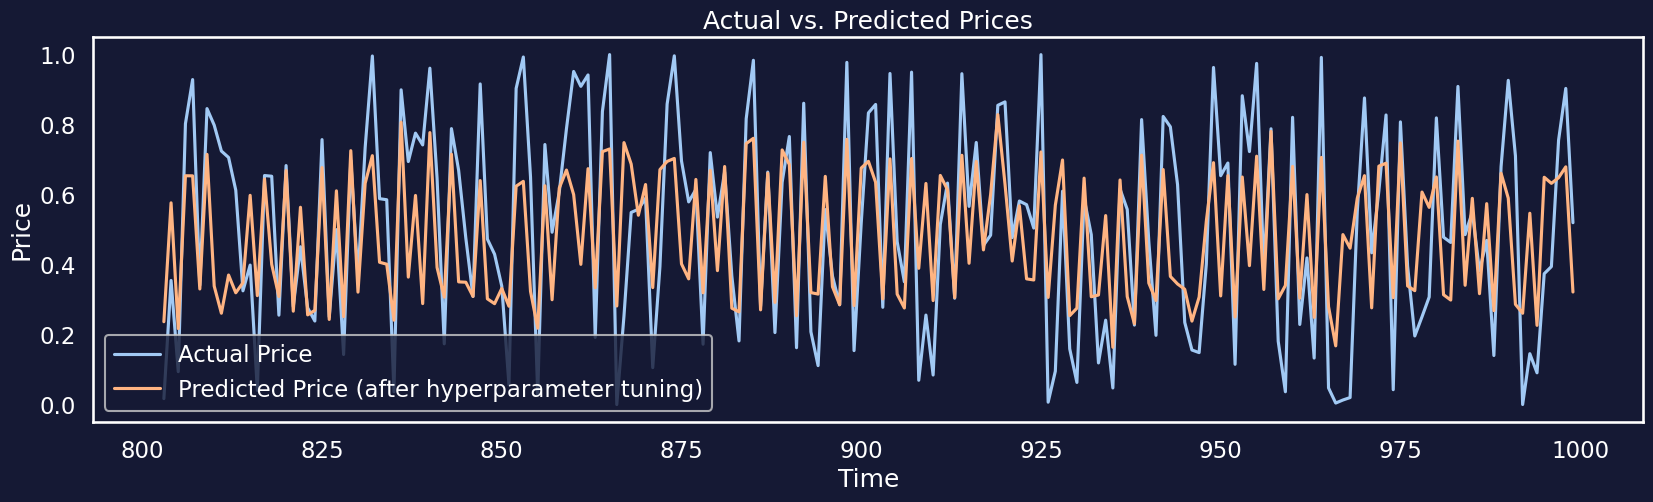

mae       mse      rmse        mape      mase
CNN_results          0.254235  0.086976  0.294917  619.151855  0.764141
Keras_no_embedding   0.071917  0.008180  0.090446  157.196518  1.015549
GPT_no_embedding     0.077100  0.008744  0.093507  183.680298  0.994452
GPT_with_embedding   0.099954  0.015853  0.125910  377.149933  0.994503
BERT_no_embedding    0.068265  0.007320  0.085559  138.391205  0.206421
BERT_with_embedding  0.168855  0.042475  0.206094  355.764343  0.510589

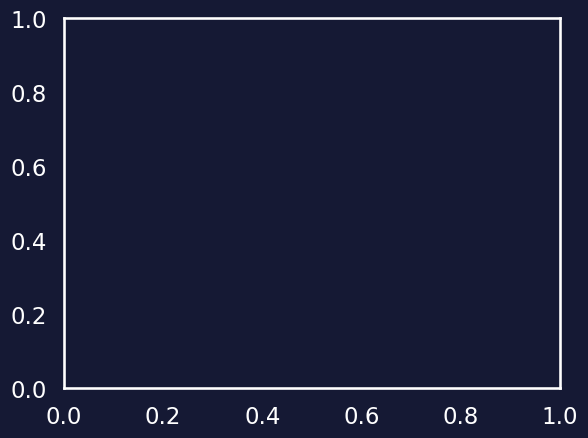

In [183]:
# prompt: write code from here for low mae change hyperparameter and learning rate

# Tune learning rate
learning_rate = 0.00005
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Tune batch size
batch_size = 64
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Tune number of epochs
epochs = 20
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Tune other hyperparameters
# Experiment with different optimizers, such as RMSprop or Nadam
# Use techniques like early stopping and model checkpointing to avoid overfitting and track progress
# Consider using a different pre-trained BERT model with larger capacity
# Explore other feature extraction methods from the BERT model, such as using the hidden states at different layers
# Incorporate other types of information, such as sentiment analysis or topic modeling, into the model

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(BERT_dense_model_results)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results
}).T  # Transpose the DataFrame for easier plotting

# Print out all model results for comparison
print("Model Comparison Results:")
print(model_results)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT, format="-", label="Predicted Price (after hyperparameter tuning)")
plt.show()
plt.grid(False)

model_results


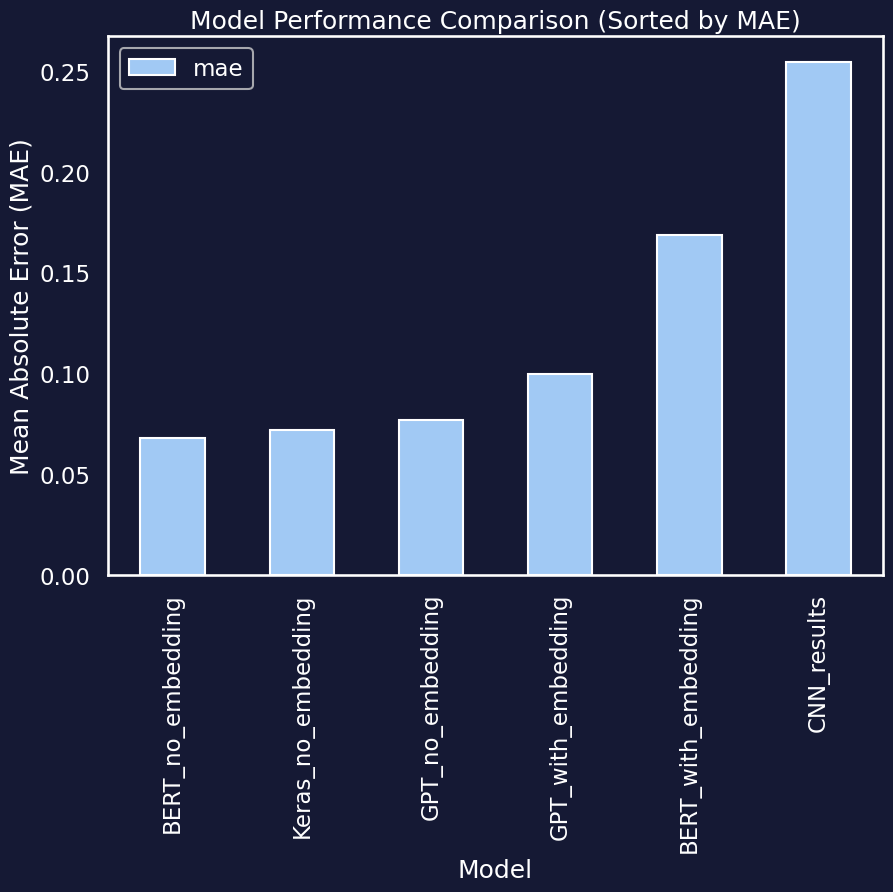

In [184]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.title("Model Performance Comparison (Sorted by MAE)")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(False)
plt.show()

In [185]:
model_results

mae       mse      rmse        mape      mase
CNN_results          0.254235  0.086976  0.294917  619.151855  0.764141
Keras_no_embedding   0.071917  0.008180  0.090446  157.196518  1.015549
GPT_no_embedding     0.077100  0.008744  0.093507  183.680298  0.994452
GPT_with_embedding   0.099954  0.015853  0.125910  377.149933  0.994503
BERT_no_embedding    0.068265  0.007320  0.085559  138.391205  0.206421
BERT_with_embedding  0.168855  0.042475  0.206094  355.764343  0.510589